# Sleep Disorder Prediction Project


# Introduction

Sleep disorders, such as Insomnia and Sleep Apnea, affect millions globally and can significantly impact physical and mental health. Early detection through predictive modeling can support targeted interventions and health management.

This project aims to predict sleep disorder categories (Insomnia, None, Sleep Apnea) based on demographic, physiological, and lifestyle features, using various machine learning models including Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting.

**Objectives:**

- Build predictive models for sleep disorder classification.

- Identify key features influencing sleep disorders.

- Compare models based on accuracy, precision, recall, and F1-score.

- Provide recommendations for practical implementation.

**Dataset & Features**

- Size: 374 records

- Target Variable: Sleep Disorder (Insomnia, None, Sleep Apnea)

**Features:**

- Numerical: Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Stress_HR, Sleep Efficiency

- Categorical: Gender, Blood Pressure, BMI Category, Occupation

**Preprocessing:**

- One-hot encoding for categorical variables

- Oversampling to handle class imbalance

**Methodology**

- Data Preprocessing

- Standardization of numerical features

- One-hot encoding of categorical features

- Oversampling for minority classes (Insomnia, Sleep Apnea)

**Modeling Approaches**

- Logistic Regression (LR)

- Decision Tree (DT)

- Random Forest (RF)

- Gradient Boosting (GB)

**Evaluation Metrics**

- Accuracy: Overall correctness

- Precision: Correctly predicted positives / All predicted positives

- Recall: Correctly predicted positives / All actual positives

- F1-score: Harmonic mean of precision and recall

- Feature importance and odds ratios for insights

**Key Insights**

**Most Predictive Features:**

- Daily Steps, Blood Pressure_140/95, BMI Category_normalweight, Sleep Efficiency.

**Class-wise Observations:**

- Insomnia is more sensitive to lifestyle factors (daily steps, sleep quality).

- Sleep Apnea is influenced by age, BMI, blood pressure, and occupation.

**Model Recommendations:**

- Primary model: Logistic Regression (interpretable, balanced, high accuracy).

- Ensemble option: Random Forest (robust to overfitting, captures interactions).

- Rule-based insights: Decision Tree (good for thresholds and clinical rules).

- Advanced pattern recognition: Gradient Boosting (subtle, complex interactions).

**Conclusion**

*This project demonstrates the application of machine learning to predict sleep disorders using a combination of demographic, physiological, and lifestyle features. The Logistic Regression model is the top choice for interpretability and balanced performance, while Random Forest and Gradient Boosting provide complementary ensemble methods.*

*Including precision and recall in evaluation provides a clear understanding of model behavior, particularly for minority classes, ensuring reliable and actionable predictions.*

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
import pickle
sns.set_style("dark")

# Loading The Dataset

In [6]:
df = pd.read_csv("C:/Users/yusuf/Downloads/sleep_health_lifestyle.csv")
df.head()

,index,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Dropping the column named index and setting the dataset index to Person ID

In [8]:
df.drop(columns="index", inplace=True)

In [9]:
df.set_index("Person ID", inplace=True)

In [10]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Data Info

From the below, every columns except for Sleep Disorder have no null value. Sleep disorder has more than half of it rows null, and after carefully observing the dataset. I realized the "None" tage for Sleep disorder are set to NaN. Thus, there is need to fill in those rows with None

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [13]:
# Filling the null values
df.fillna("None", inplace=True)

In [14]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [15]:
df.describe(include="object")

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


In [16]:
# All columns are non-null, that implies we have no null values
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

# Data Exploration

In [18]:
# checking the distribution of Gender across the dataset
df["Gender"].value_counts(normalize=True)

Gender
Male      0.505348
Female    0.494652
Name: proportion, dtype: float64

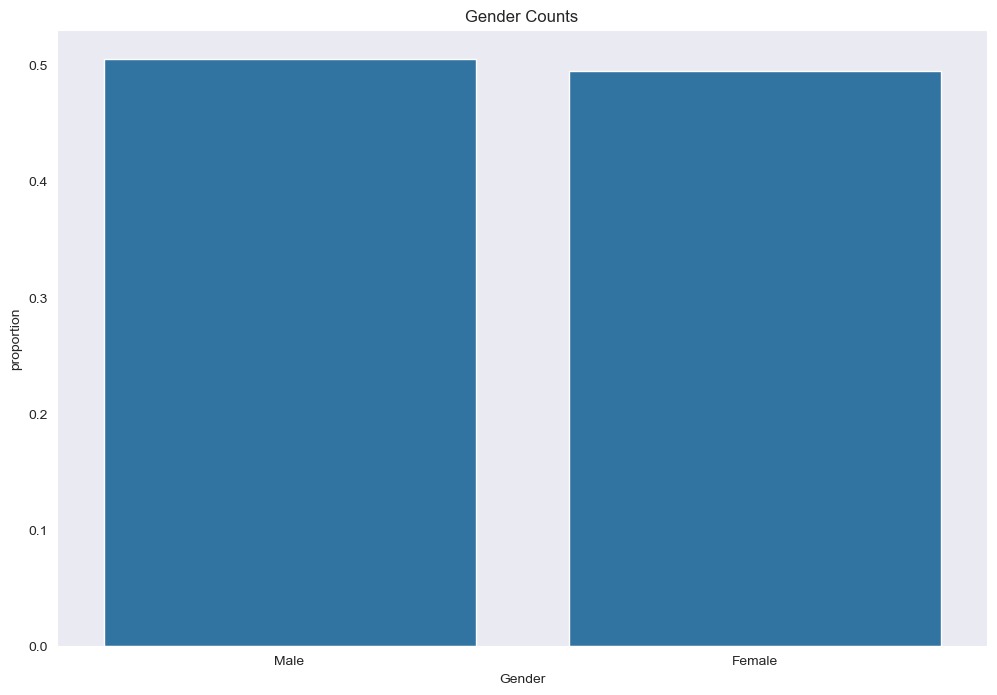

In [19]:
# showing Gender distribution on a barchart; male and Female are approximately equally represented
gender_dis = df["Gender"].value_counts(normalize=True)
plt.figure(figsize=(12,8))
g = sns.barplot(data=gender_dis)
plt.title("Gender Counts")
plt.show()

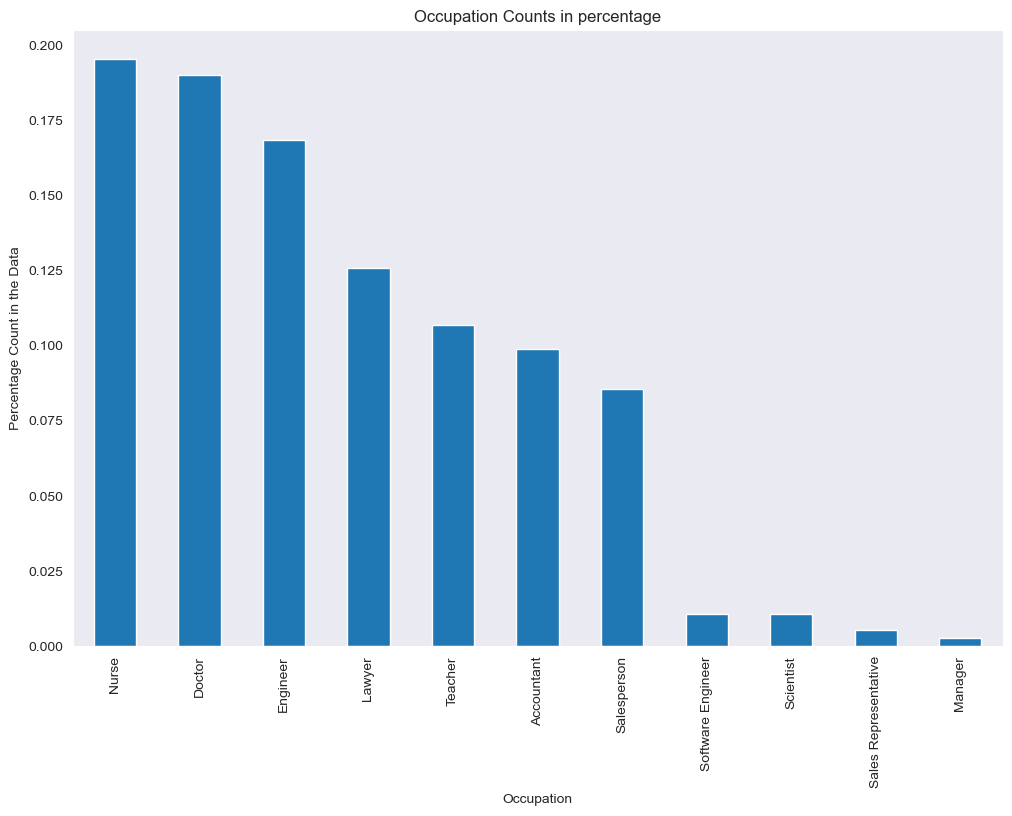

In [20]:
# Occupation distribution, it is clear some occupation dominates our dataset
plt.figure(figsize=(12,8))
df["Occupation"].value_counts(normalize=True).plot(kind="bar",
                                                  xlabel="Occupation",
                                                  ylabel="Percentage Count in the Data",
                                                  title="Occupation Counts in percentage");

# BMI (Body Mass Index)

BMI is one of the most established medical predictors of sleep apnea.

| Category                   | Typical BMI Range | Meaning                        |
| -------------------------- | ----------------- | ------------------------------ |
| **Normal / Normal weight** | 18.5–24.9         | Healthy weight                 |
| **Overweight**             | 25.0–29.9         | Increased weight but not obese |
| **Obesity**                | ≥ 30.0            | High risk category             |


**The Overall Pattern**

*The data suggests a strong positive correlation between BMI and sleep disorders:*

*As BMI increases from normal → overweight → obese, the likelihood and severity of sleep disorders dramatically increase.

In [22]:
# checking the unique BMI category in the dataset
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [23]:
# Removing space, converting to lower case, and combining both normal and normal weight BMI
df["BMI Category"] = df["BMI Category"].str.strip().str.lower()
df["BMI Category"] = df["BMI Category"].replace({
    "normal": "normalweight",
    "normal weight": "normalweight"
})

In [24]:
df["BMI Category"].unique()

array(['overweight', 'normalweight', 'obese'], dtype=object)

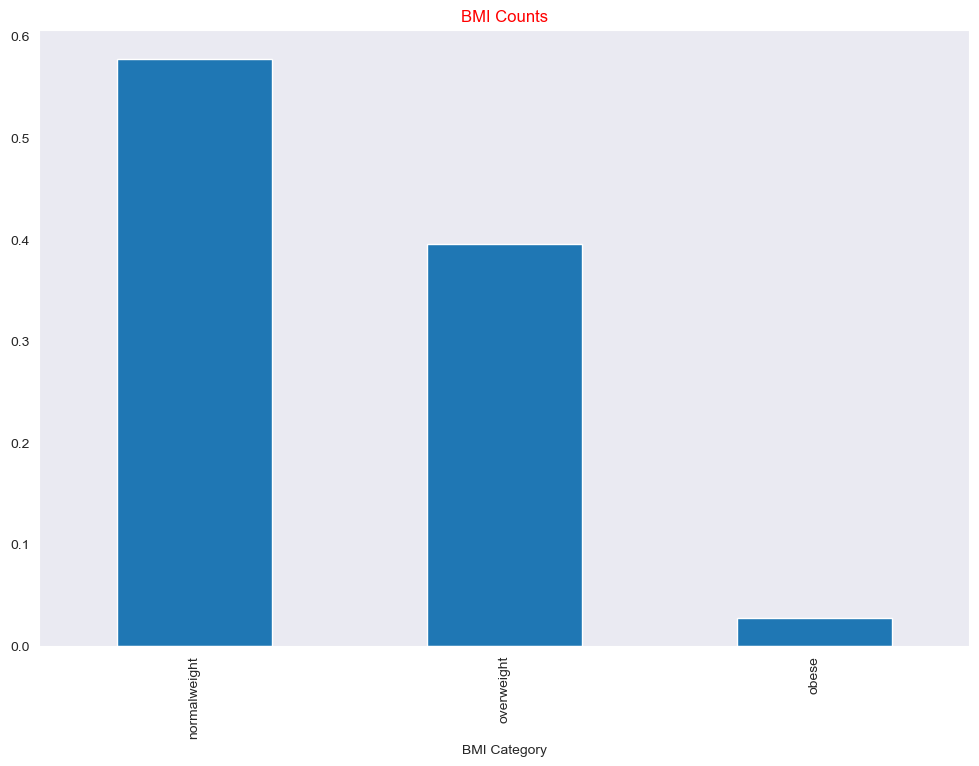

In [25]:
plt.figure(figsize=(12,8))
df["BMI Category"].value_counts(normalize=True).plot(kind="bar")
plt.title("BMI Counts", color="red");

**Obese Group**

- approx. 33% Insomnia

- approx. 57% Sleep Apnea

**Why this makes sense:**
Higher body fat — especially around the neck, chest, and abdomen, increases airway resistance and disrupts normal breathing, which explains the high rate of sleep apnea.

**Obesity is also linked to:**
- Hormonal imbalances (e.g., leptin, ghrelin)
- Inflammation
- Cardiometabolic stress

**All of these contribute to difficulty falling or staying asleep, leading to higher insomnia rates. So obesity creates both mechanical and physiological pathways to sleep disorders.**

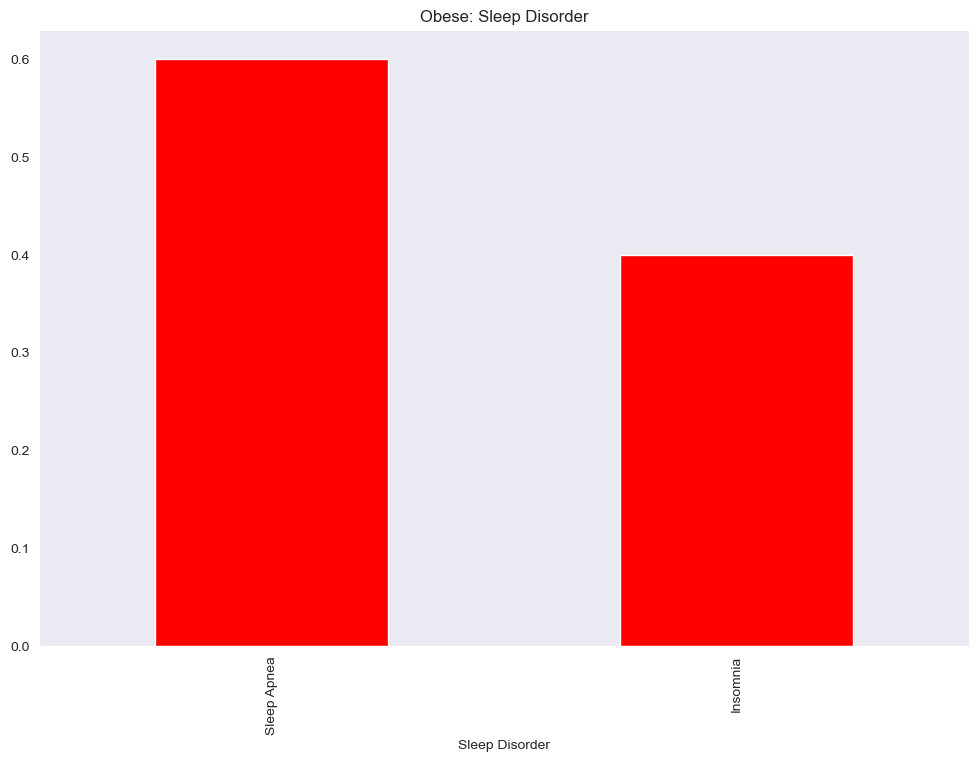

In [27]:
plt.figure(figsize=(12,8))
df[df["BMI Category"]=="obese"]["Sleep Disorder"].value_counts(normalize=True).plot(kind="bar", color="red")
plt.title("Obese: Sleep Disorder")
plt.show()

**Overweight Group**

- 40%+ Insomnia

- 40%+ Sleep Apnea

- ~10% None

**This group shows that sleep disorders start becoming substantially more common even before reaching obesity.**


**Being overweight increases:**

- Snoring

- Mild airway obstruction

- GERD (acid reflux), which disrupts sleep

- Stress on the cardiovascular system

**This leads to a significant rise in both insomnia and sleep apnea, though not as severe as in obesity.**

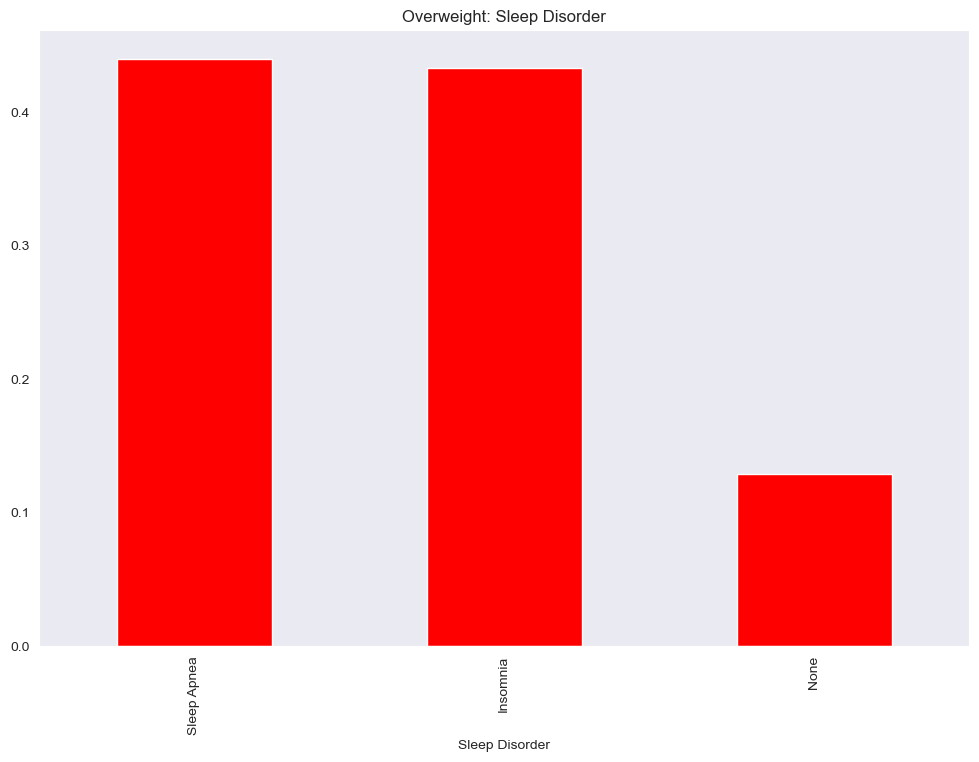

In [29]:
plt.figure(figsize=(12,8))
df[df["BMI Category"]=="overweight"]["Sleep Disorder"].value_counts(normalize=True).plot(kind="bar", color="red")
plt.title("Overweight: Sleep Disorder")
plt.show()

**Normal Weight Group**

- 90%+ No Sleep Disorder

- <5% Sleep Apnea or Insomnia

**Normal BMI → lower inflammation → better metabolic health → stable breathing patterns.**

**This group has:**

- Healthy airway mechanics

- Better hormonal regulation

- Lower cardiometabolic stress

- So their risk of sleep disorders is naturally low.

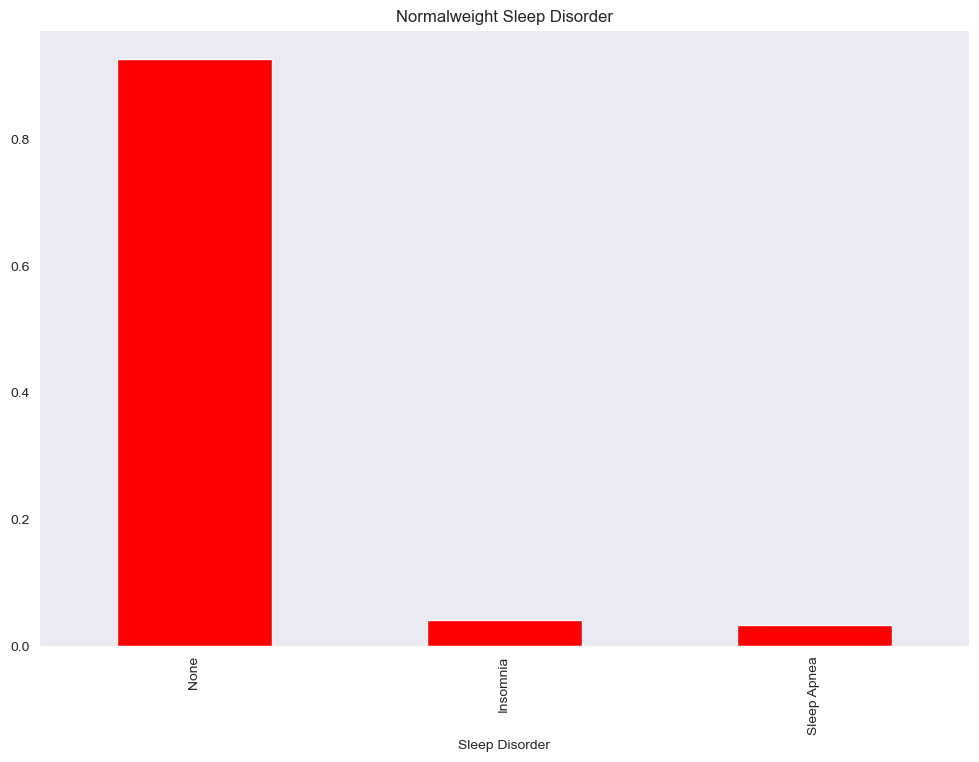

In [31]:
plt.figure(figsize=(12,8))
df[df["BMI Category"]=="normalweight"]["Sleep Disorder"].value_counts(normalize=True).plot(kind="bar", color="red")
plt.title("Normalweight Sleep Disorder")
plt.show()

In [32]:
df.groupby(["BMI Category", "Sleep Disorder"])[["Sleep Duration", "Quality of Sleep"]].agg(['mean', 'min', 'max'])

Sleep Duration           Quality of Sleep        
                                      mean  min  max             mean min max
BMI Category Sleep Disorder                                                  
normalweight Insomnia             7.200000  6.0  8.3         7.222222   5   9
             None                 7.411500  6.0  8.5         7.690000   6   9
             Sleep Apnea          6.957143  6.0  7.8         6.714286   5   8
obese        Insomnia             6.700000  5.9  7.3         6.000000   4   7
             Sleep Apnea          7.133333  5.9  8.1         6.666667   4   9
overweight   Insomnia             6.496875  6.1  6.8         6.468750   5   7
             None                 6.800000  6.0  8.1         6.947368   6   9
             Sleep Apnea          7.030769  5.8  8.2         7.307692   4   9

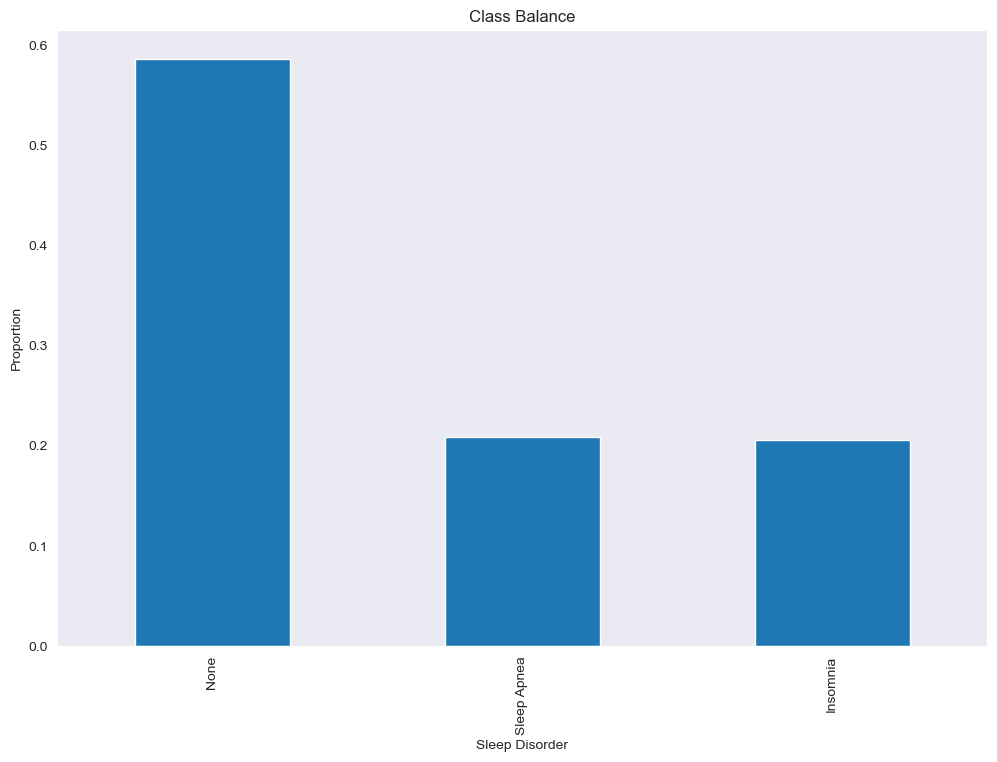

In [33]:
# Value counts of Sleep Disorder column, there seems to be an imbalance and this will be looked at the modeling stage
plt.figure(figsize=(12,8))
df["Sleep Disorder"].value_counts(normalize=True).plot(kind="bar",
                                                      ylabel="Proportion",
                                                      title="Class Balance");

# Gender, Sleep Disorder Types, and the physiological / lifestyle variables.

**Baseline Insight**

Males in this dataset tend to be younger, more active, more stressed, and have poorer sleep quality than females.


**Insomnia**

Men with insomnia show:

- the highest stress levels (6.76)

- highest heart rate (73 bpm)

- worst sleep quality (6.17)

**This strongly suggests a stress-driven insomnia pattern, especially in males.**

Women with insomnia have:

- slightly longer sleep (but still low)

- better sleep quality

- lower stress

**Insomnia looks more stress-driven in males, while in females it is more age- and lifestyle-related.**


**Sleep Apnea**

Females with apnea:

- Are the oldest group (51+)

- Highly active (78 activity score, 8k steps)

- Still have moderate sleep quality

**Female sleep apnea may be age-related rather than lifestyle-related.** 


Males with apnea:

- Younger (37)

- Lower physical activity

- Higher heart rate

- Lower sleep quality

**Male apnea is more associated with physiology (airway structure), weight, and low activity.**

In [35]:
df[df["Sleep Disorder"]=="None"].groupby("Gender")[["Age", "Sleep Duration", "Physical Activity Level", 
                                                    "Stress Level", "Heart Rate", "Daily Steps", "Quality of Sleep"]].mean()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Quality of Sleep
Gender,,,,,,,
Female,44.926829,7.650000,50.146341,3.817073,67.54878,6275.609756,8.280488
Male,35.510949,7.183942,62.620438,5.890511,69.89781,7198.540146,7.233577


In [36]:
df[df["Sleep Disorder"]=="Insomnia"].groupby("Gender")[["Age", "Sleep Duration", "Physical Activity Level", 
                                                    "Stress Level", "Heart Rate", "Daily Steps", "Quality of Sleep"]].mean()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Quality of Sleep
Gender,,,,,,,
Female,44.944444,6.633333,45.000000,4.861111,67.305556,6002.777778,6.944444
Male,42.268293,6.551220,48.414634,6.756098,73.243902,5812.195122,6.170732


In [37]:
df[df["Sleep Disorder"]=="Sleep Apnea"].groupby("Gender")[["Age", "Sleep Duration", "Physical Activity Level", 
                                                    "Stress Level", "Heart Rate", "Daily Steps", "Quality of Sleep"]].mean()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Quality of Sleep
Gender,,,,,,,
Female,51.761194,7.035821,77.746269,5.626866,72.402985,7982.089552,7.298507
Male,37.181818,7.009091,56.818182,5.909091,77.272727,5409.090909,6.636364


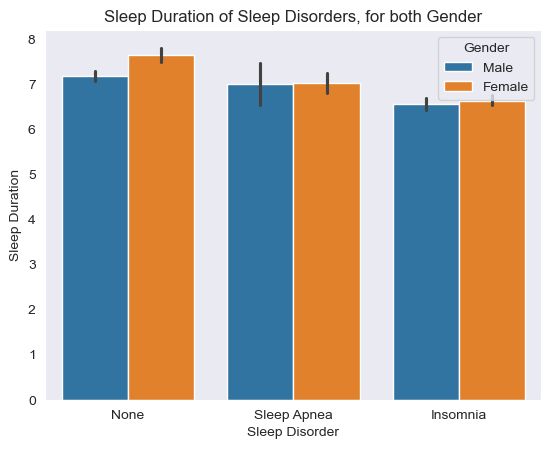

In [38]:
sns.barplot(data=df, x="Sleep Disorder", y="Sleep Duration", hue="Gender")
plt.title("Sleep Duration of Sleep Disorders, for both Gender")
plt.show()

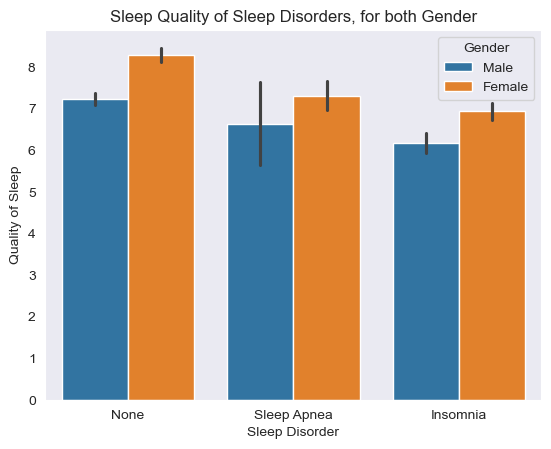

In [39]:
sns.barplot(data=df, x="Sleep Disorder", y="Quality of Sleep", hue="Gender")
plt.title("Sleep Quality of Sleep Disorders, for both Gender")
plt.show()

# Heart Rate
Heart rate reflects the balance between the sympathetic nervous system (“fight or flight”) and parasympathetic system (“rest and digest”).
Sleep disorders disturb this balance

| Sleep Disorder                 | Heart Rate Behavior                                                   |
| ------------------------------ | --------------------------------------------------------------------- |
| **Insomnia**                   | Elevated resting HR due to hyperarousal; frequent nighttime HR spikes |
| **Sleep Apnea**                | Abrupt HR changes when breathing stops (apneic events)                |


**From the plot below, it could be clearly seen that the average Heart Rate for people having both Insomnia and Sleep Apnea is above the heart rate of people that have no sleep disorder**

**Interpretation from the bar chart**

- Higher HR may predict insomnia or poor sleep efficiency.

- High HR variability (if available) correlates with sleep fragmentation.

- HR can be combined with stress for stronger prediction.

In [41]:
df.groupby("Sleep Disorder")["Heart Rate"].mean()

Sleep Disorder
Insomnia       70.467532
None           69.018265
Sleep Apnea    73.089744
Name: Heart Rate, dtype: float64

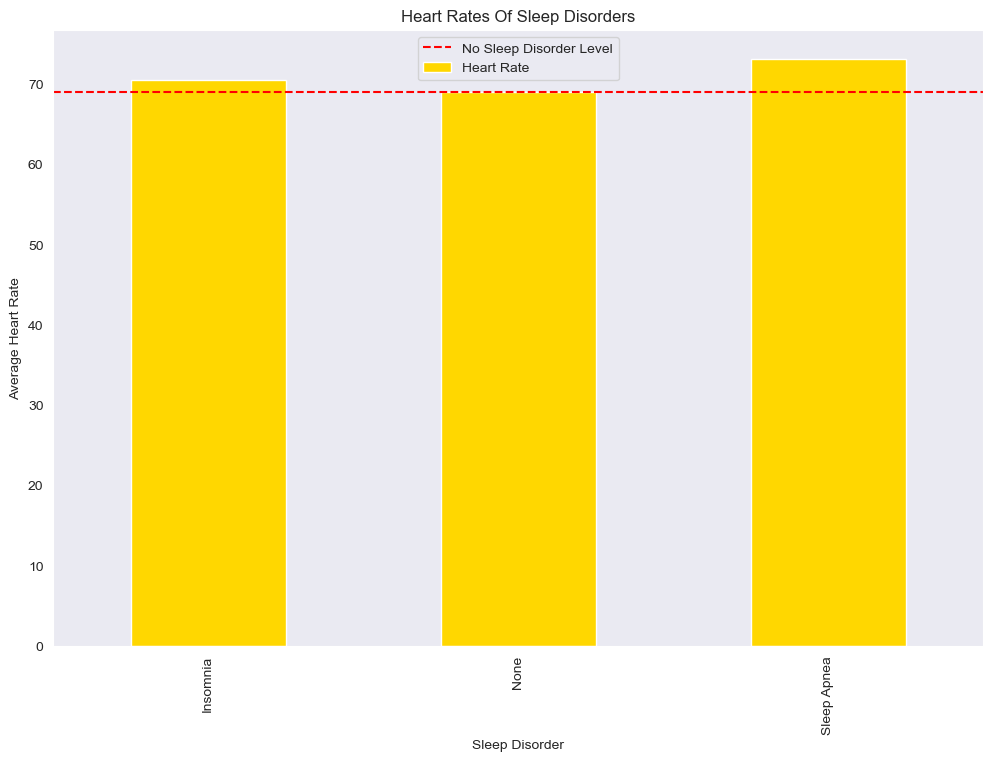

In [42]:
plt.figure(figsize=(12,8))
df.groupby("Sleep Disorder")["Heart Rate"].mean().plot(kind="bar", color="gold")
plt.axhline(69, linestyle="--", color="red", label="No Sleep Disorder Level")
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Heart Rate")
plt.title("Heart Rates Of Sleep Disorders")
plt.legend()
plt.show()

# How Blood Pressure Connects to Sleep Disorders (Across BMI Groups)

**High blood pressure clusters with sleep apnea and insomnia, especially among overweight and obese groups. Normal blood pressure is strongly associated with having no sleep disorder, particularly in normal-weight individuals. This suggests that BMI and blood pressure jointly influence the likelihood of sleep disruption, high BMI leads to hypertension, which further increases the risk of both sleep apnea and insomnia.**

**High Blood Pressure → Sleep Apnea & Insomnia Are Much More Common**

**Across the entire dataset:**

- 140/95 is overwhelmingly associated with Sleep Apnea (≈40%), and also appears with Insomnia.

- Very few “None” cases occur at high BP levels like 140/95.

**This is medically consistent because:**
High blood pressure (hypertension) is strongly linked to:

- Obstructive Sleep Apnea (OSA) because airway collapse causes repeated oxygen drops → BP spikes

- Insomnia through hyperarousal, stress, and sympathetic nervous system activation

So hypertensive individuals rarely have “no sleep disorder”.

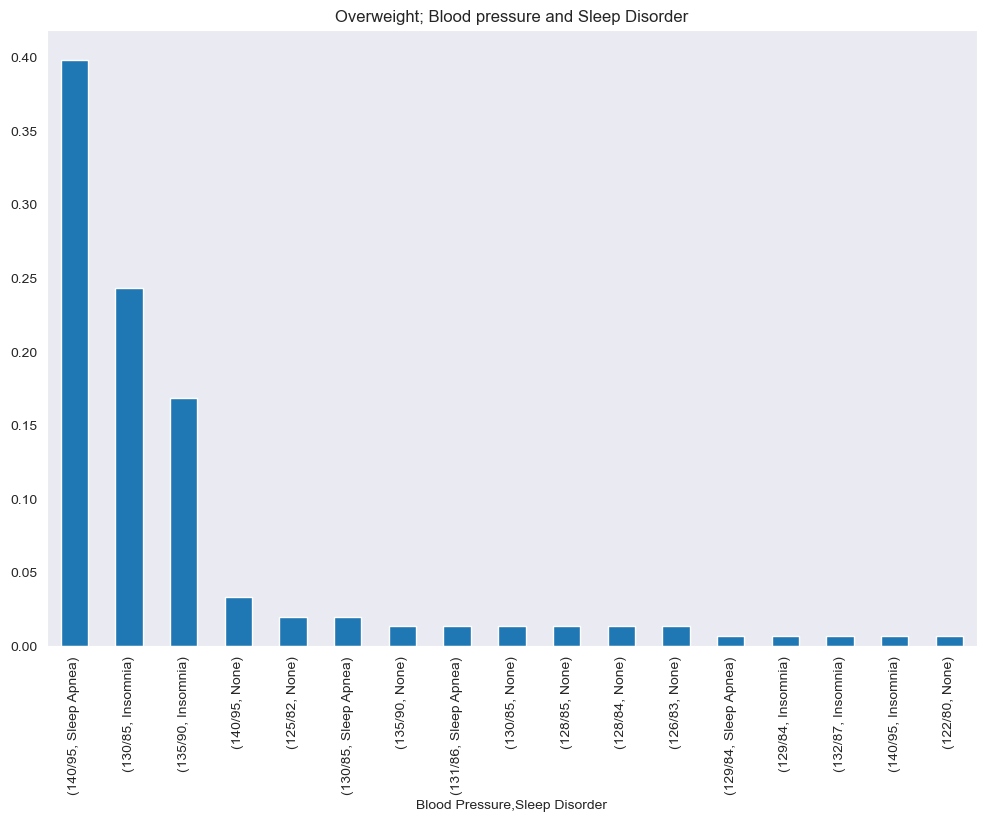

In [45]:
plt.figure(figsize=(12,8))
df[df["BMI Category"]=="overweight"][["Blood Pressure","Sleep Disorder"]].value_counts(normalize=True).plot(kind="bar")
plt.title("Overweight; Blood pressure and Sleep Disorder")
plt.show()

**Obese Group: High BP + Sleep Disorders Are Clustered Together**


I found:

- All obese individuals have moderately high to very high BP (135/88, 139/91, 140/90, 142/92)

- And every one of those BP categories matches either Sleep Apnea or Insomnia

- 0% “None”


**Obesity → elevated BP → significant respiratory and metabolic stress → sleep disorders occur consistently.**

This is a classic “metabolic cluster”:
Obesity → Hypertension → Sleep Apnea + Insomnia

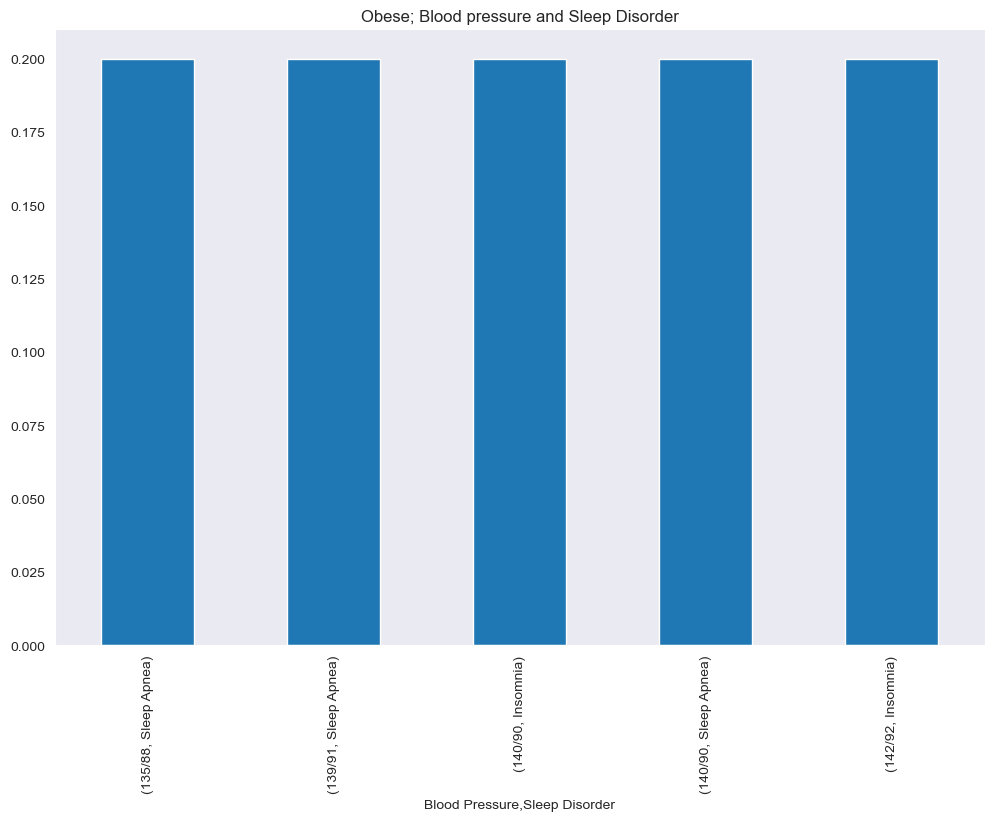

In [47]:
plt.figure(figsize=(12,8))
df[df["BMI Category"]=="obese"][["Blood Pressure","Sleep Disorder"]].value_counts(normalize=True).plot(kind="bar")
plt.title("Obese; Blood pressure and Sleep Disorder")
plt.show()

**Normal or Near-Normal BP → Mostly No Sleep Disorder**

For BP ranges like:

- 115/75

- 120/80

- 125/80

- 130/85

**You see dominance of “None” in the sleep disorder column.**

Normal-weight individuals especially show:

- Over 85–90% No Disorder

- Only tiny proportions of insomnia or apnea

**Normal BP → healthy cardiovascular & respiratory systems → stable sleep regulation → low risk of apnea and insomnia.**

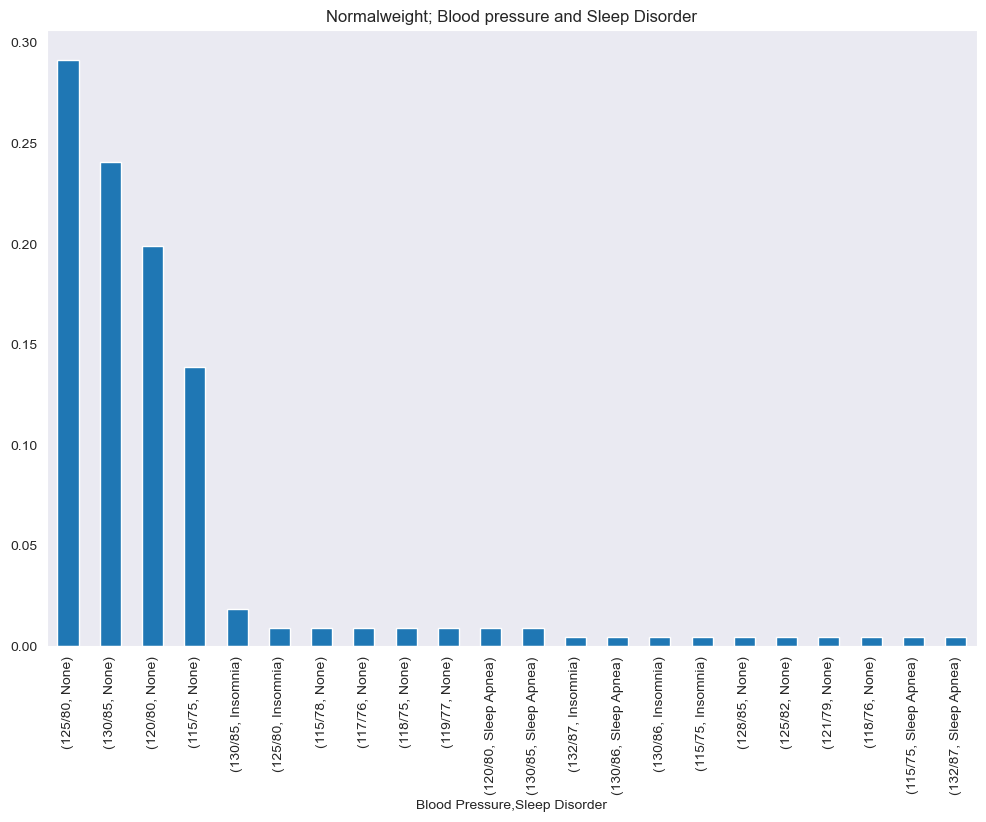

In [49]:
plt.figure(figsize=(12,8))
df[df["BMI Category"]=="normalweight"][["Blood Pressure","Sleep Disorder"]].value_counts(normalize=True).plot(kind="bar")
plt.title("Normalweight; Blood pressure and Sleep Disorder")
plt.show()

# Occupation Distribution And Sleep Disorders

**Occupation shows strong predictive power for sleep disorders. Nurses have the highest risk of sleep apnea (78%), likely due to rotating night shifts and circadian disruption. In contrast, insomnia is most prevalent among Salespersons (38%) and Teachers (35%), reflecting high job stress, long hours, and irregular routines. This aligns with known occupational health data and suggests occupation is a valuable input variable for prediction modeling.**

In [51]:
df.groupby([ "Occupation", "Sleep Disorder"])[["Sleep Duration", "Quality of Sleep"]].agg(['mean', 'min', 'max'])

Sleep Duration           Quality of Sleep  \
                                              mean  min  max             mean   
Occupation           Sleep Disorder                                             
Accountant           Insomnia             6.657143  6.5  7.2         7.142857   
                     None                 7.220000  7.1  8.0         8.066667   
Doctor               Insomnia             6.866667  6.0  7.3         6.666667   
                     None                 6.943750  6.0  8.2         6.578125   
                     Sleep Apnea          7.475000  6.0  8.1         7.750000   
Engineer             Insomnia             7.440000  6.5  8.3         7.400000   
                     None                 8.038596  6.9  8.5         8.508772   
                     Sleep Apnea          7.800000  7.8  7.8         8.000000   
Lawyer               Insomnia             7.400000  7.2  7.6         8.000000   
                     None                 7.419048  6.9  7.9         7.928571   
                     Sleep Apnea          7.300000  7.1  7.4         7.333333   
Manager              None                 6.900000  6.9  6.9         7.000000   
Nurse                Insomnia             6.333333  6.1  6.5         5.333333   
                     None                 7.222222  6.0  8.1         7.555556   
                     Sleep Apnea          7.075410  5.9  8.2         7.442623   
Sales Representative Sleep Apnea          5.900000  5.9  5.9         4.000000   
Salesperson          Insomnia             6.396552  6.3  6.5         6.000000   
                     None                 6.450000  6.4  6.5         6.000000   
                     Sleep Apnea          6.500000  6.5  6.5         6.000000   
Scientist            None                 6.200000  6.2  6.2         6.000000   
                     Sleep Apnea          5.800000  5.8  5.8         4.000000   
Software Engineer    Insomnia             5.900000  5.9  5.9         4.000000   
                     None                 7.033333  6.1  7.5         7.333333   
Teacher              Insomnia             6.585185  6.3  6.8         6.888889   
                     None                 6.933333  6.6  7.2         7.555556   
                     Sleep Apnea          6.850000  6.6  7.2         6.250000   

                                             
                                    min max  
Occupation           Sleep Disorder          
Accountant           Insomnia         7   8  
                     None             8   9  
Doctor               Insomnia         6   7  
                     None             6   9  
                     Sleep Apnea      6   9  
Engineer             Insomnia         5   9  
                     None             6   9  
                     Sleep Apnea      8   8  
Lawyer               Insomnia         8   8  
                     None             7   8  
                     Sleep Apnea      7   8  
Manager              None             7   7  
Nurse                Insomnia         5   6  
                     None             6   9  
                     Sleep Apnea      5   9  
Sales Representative Sleep Apnea      4   4  
Salesperson          Insomnia         6   6  
                     None             6   6  
                     Sleep Apnea      6   6  
Scientist            None             6   6  
                     Sleep Apnea      4   4  
Software Engineer    Insomnia         4   4  
                     None             6   8  
Teacher              Insomnia         5   7  
                     None             7   8  
                     Sleep Apnea      5   8

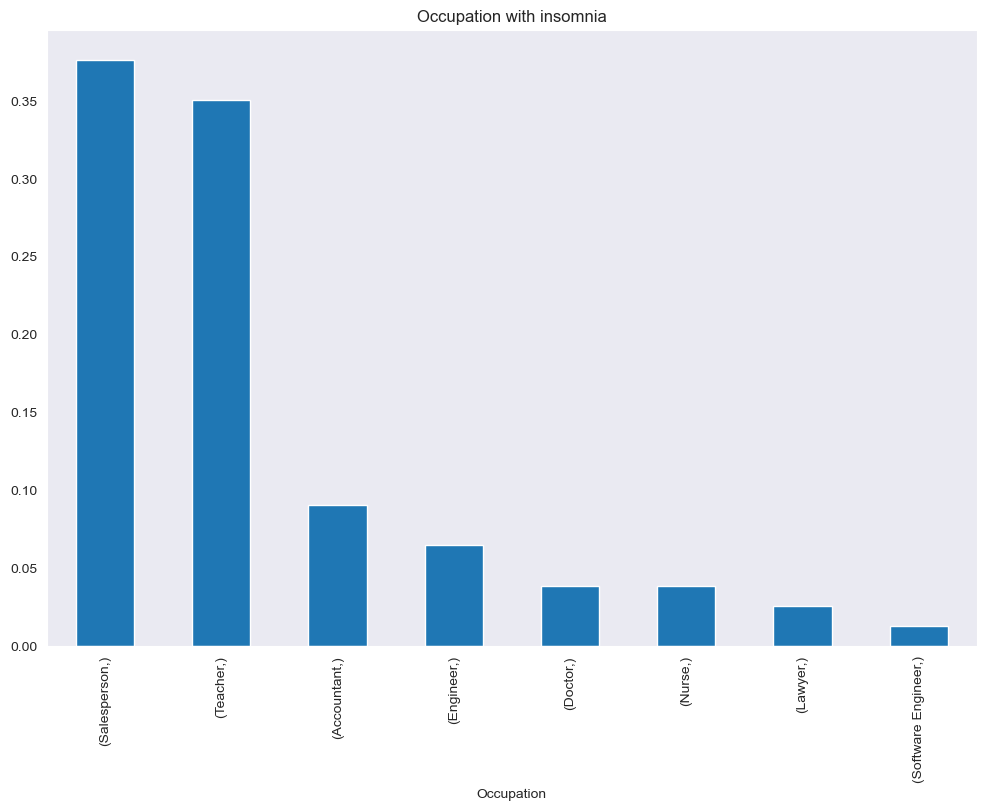

In [52]:
plt.figure(figsize=(12,8))
df[df["Sleep Disorder"]=="Insomnia"][["Occupation"]].value_counts(normalize=True).plot(kind="bar")
plt.title("Occupation with insomnia")
plt.show()

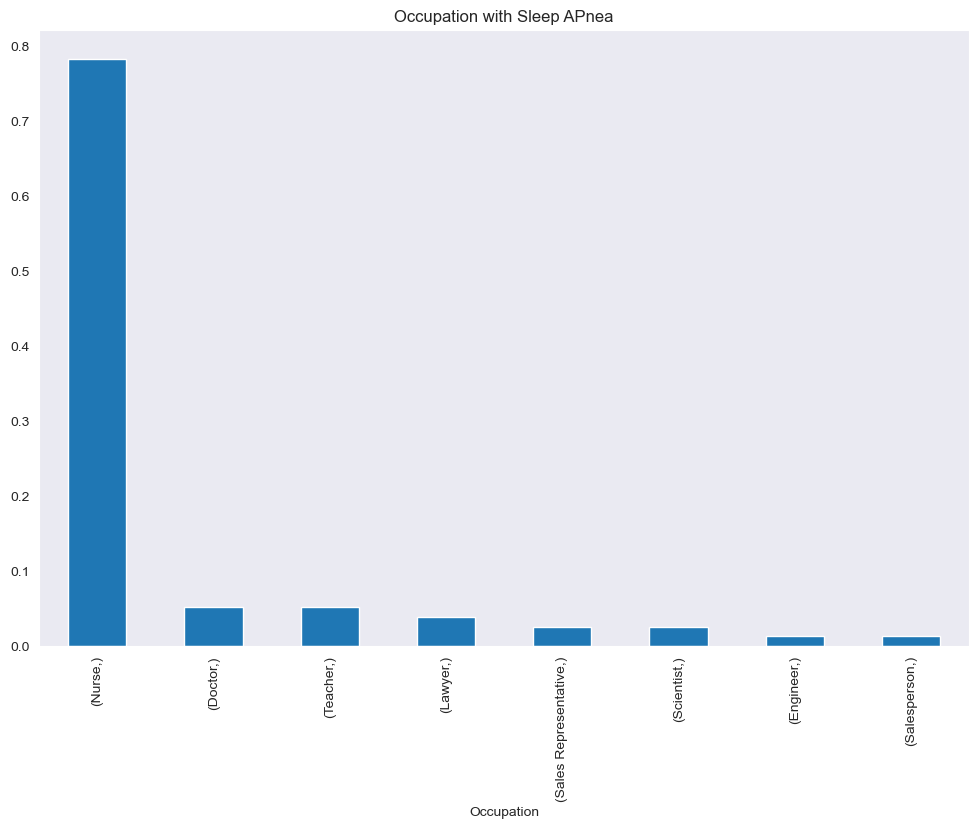

In [53]:
plt.figure(figsize=(12,8))
df[df["Sleep Disorder"]=="Sleep Apnea"][["Occupation"]].value_counts(normalize=True).plot(kind="bar")
plt.title("Occupation with Sleep APnea")
plt.show()

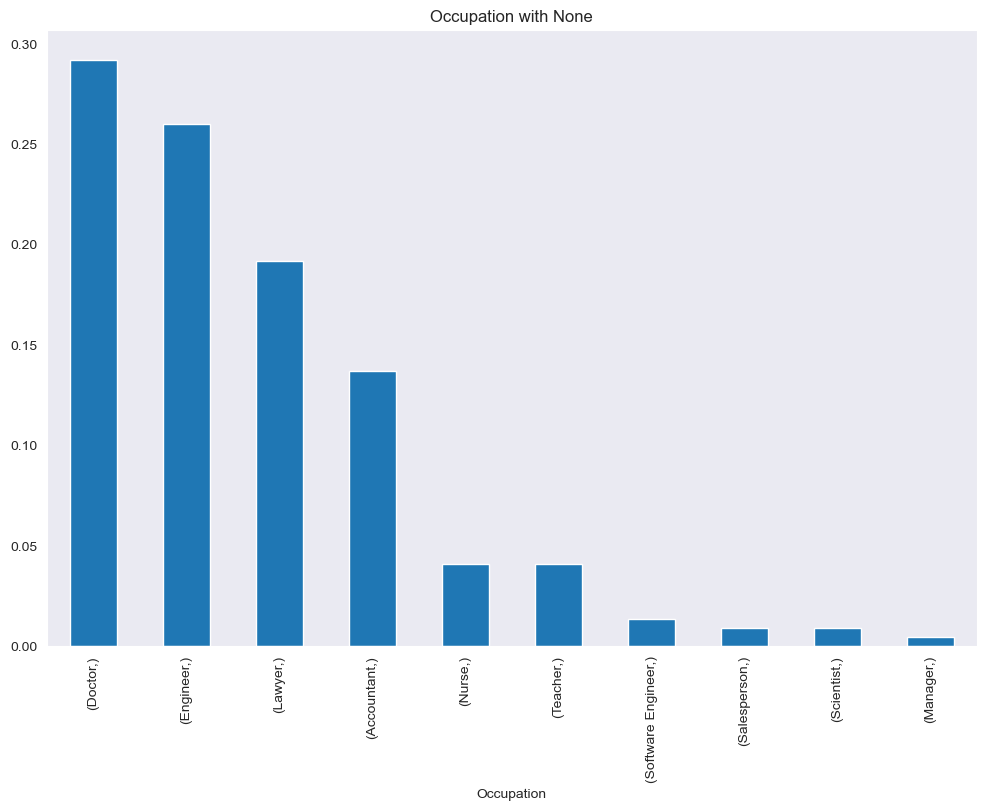

In [54]:
plt.figure(figsize=(12,8))
df[df["Sleep Disorder"]=="None"][["Occupation"]].value_counts(normalize=True).plot(kind="bar")
plt.title("Occupation with None")
plt.show()

# Correlation Matrix For Numerical Columns

**Stress Level is the strongest single predictor of poor sleep**

- Stress ↘ Sleep Duration (–0.81)

- Stress ↘ Quality of Sleep (–0.90)

- Stress ↗ Heart Rate (+0.67)

**Stress activates the sympathetic nervous system, causing elevated heart rate and difficulty sleeping.**

*High stress = insomnia risk*
*High heart rate + stress = possible sleep apnea (physiological arousal)*

This matches the earlier findings that insomnia clusters in high-stress occupations (sales, teachers).


**Quality of Sleep is almost entirely explained by sleep duration + stress**

- Quality ↗ Sleep Duration (0.88)

- Quality ↘ Stress (–0.90)

- Quality ↘ Heart Rate (–0.66)


Poor-quality sleep is not random — it results from:

- Short sleep duration

- Stress

- Elevated heart rate (fragmented sleep)

**High predictive power → This variable is very informative for modeling.**


 
**Physical Activity + Daily Steps move together (0.77)**

This is expected — more steps means more physical activity.

But, activity has no strong relationship with sleep or stress in the dataset.

**This could mean: activity level varies but does not directly influence their sleep disorder labels.**

**It may not be a strong predictor for the ML model.**



**Heart Rate is a physiological marker for sleep problems**

- Heart Rate ↗ Stress (0.67)

- Heart Rate ↘ Sleep Duration (–0.52)

- Heart Rate ↘ Quality (–0.66)


High resting heart rate indicates:

- Stress

- Poor cardiovascular recovery

- Fragmented sleep

- Potential sleep apnea episodes (heart spikes during apnea events)

**Heart Rate is useful for both insomnia and sleep apnea classification.**



**Age mildly increases sleep duration and quality**

- Age ↗ Sleep Duration (0.34)

- Age ↗ Sleep Quality (0.47)

Older adults in the dataset:

- Sleep slightly longer

- Report better sleep quality

***I think this is dataset-specific, because in real-world studies, older adults often have poorer sleep.***
it may seem as though that the sample include:
- Young high-stress workers (teachers, sales)
- Older workers in stable careers (doctor, accountant)

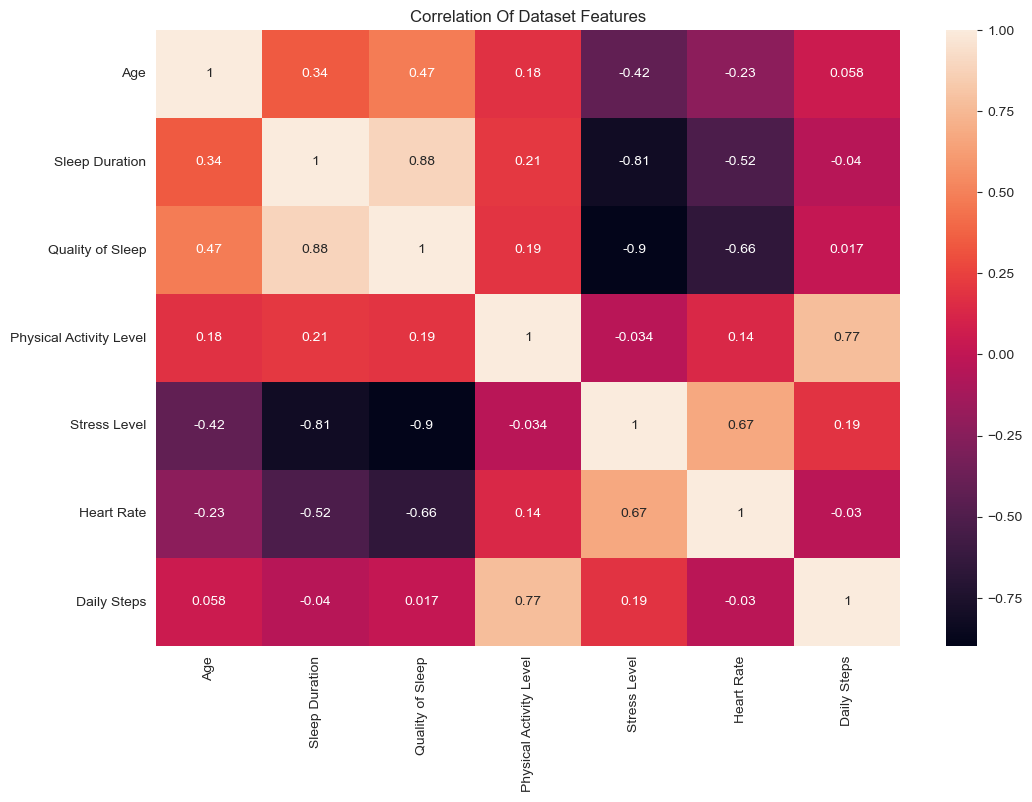

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes("number").corr(), annot=True)
plt.title("Correlation Of Dataset Features")
plt.show()

<Figure size 1200x800 with 0 Axes>

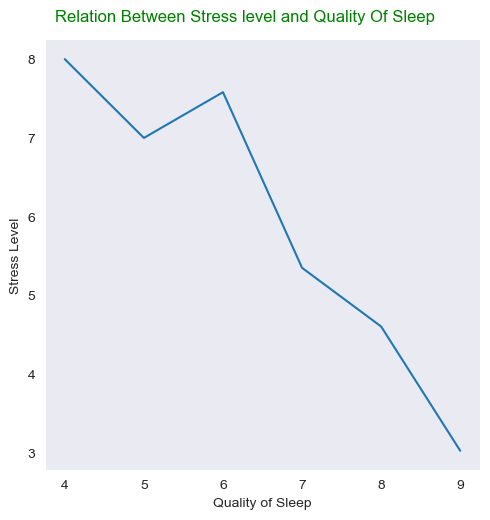

In [57]:
plt.figure(figsize=(12,8))
g= sns.relplot(data=df, x="Quality of Sleep", y= "Stress Level", errorbar=None, kind="line")
g.fig.suptitle("Relation Between Stress level and Quality Of Sleep", y=1.03, color="green")
plt.show()

<Figure size 1500x800 with 0 Axes>

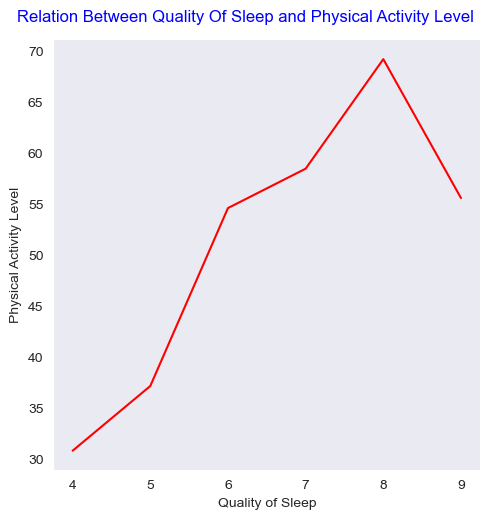

In [58]:
plt.figure(figsize=(15,8))
g=sns.relplot(x="Quality of Sleep",y="Physical Activity Level", 
            data=df, kind="line", errorbar=None, color="red")
g.fig.suptitle("Relation Between Quality Of Sleep and Physical Activity Level", y=1.03, color="blue")
plt.show()

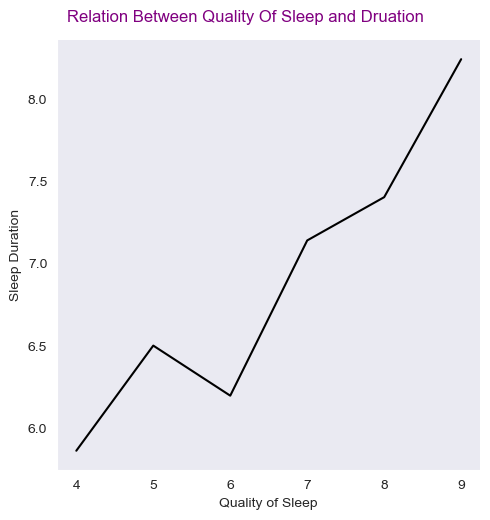

In [59]:
g=sns.relplot(x="Quality of Sleep",y="Sleep Duration", 
            data=df, kind="line", errorbar=None, color="black")
g.fig.suptitle("Relation Between Quality Of Sleep and Druation", y=1.03, color="purple")
plt.show()

# Feature Engineering

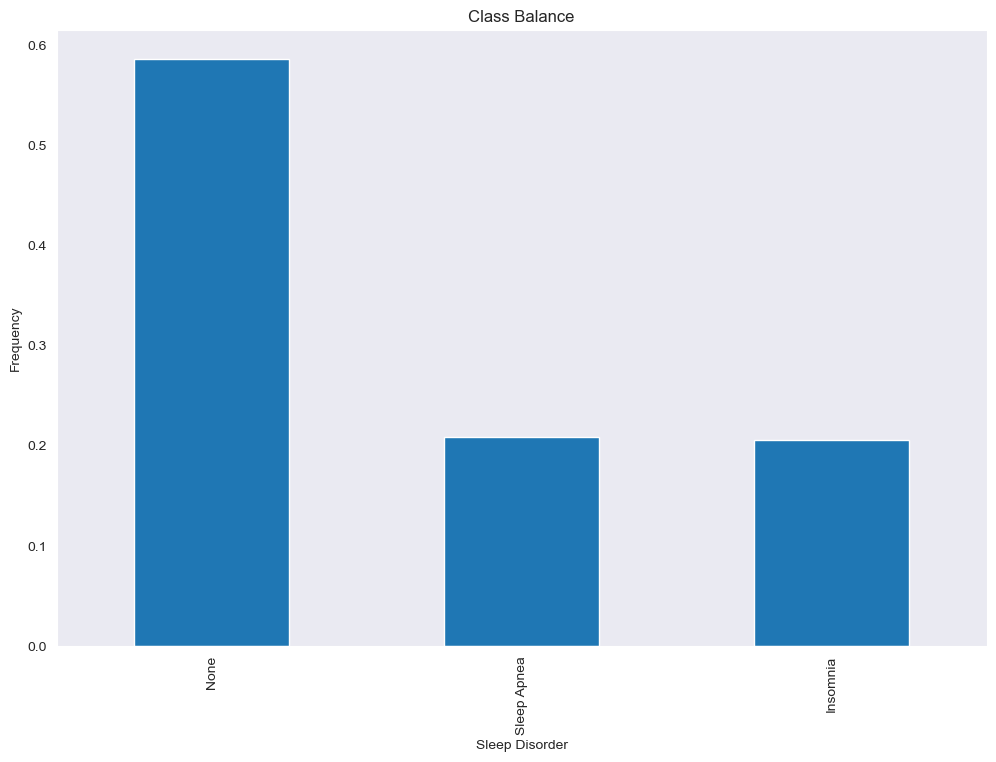

In [61]:
plt.figure(figsize=(12,8))
df["Sleep Disorder"].value_counts(normalize=True).plot(kind="bar",
                                                      xlabel="Sleep Disorder",
                                                      ylabel="Frequency",
                                                      title="Class Balance");


In [62]:
df["Stress_HR"] = df["Stress Level"] * df["Heart Rate"]
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Stress_HR
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,overweight,126/83,77,4200,None,462
2,Male,28,Doctor,6.2,6,60,8,normalweight,125/80,75,10000,None,600
3,Male,28,Doctor,6.2,6,60,8,normalweight,125/80,75,10000,None,600
4,Male,28,Sales Representative,5.9,4,30,8,obese,140/90,85,3000,Sleep Apnea,680
5,Male,28,Sales Representative,5.9,4,30,8,obese,140/90,85,3000,Sleep Apnea,680


In [63]:
df["Sleep Efficiency"] = df["Quality of Sleep"]/df["Sleep Duration"]
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Stress_HR,Sleep Efficiency
Person ID,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,overweight,126/83,77,4200,None,462,0.983607
2,Male,28,Doctor,6.2,6,60,8,normalweight,125/80,75,10000,None,600,0.967742
3,Male,28,Doctor,6.2,6,60,8,normalweight,125/80,75,10000,None,600,0.967742
4,Male,28,Sales Representative,5.9,4,30,8,obese,140/90,85,3000,Sleep Apnea,680,0.677966
5,Male,28,Sales Representative,5.9,4,30,8,obese,140/90,85,3000,Sleep Apnea,680,0.677966


In [64]:
df["Short Sleep"] = (df["Sleep Duration"]<6).astype(int)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Stress_HR,Sleep Efficiency,Short Sleep
Person ID,,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,overweight,126/83,77,4200,None,462,0.983607,0
2,Male,28,Doctor,6.2,6,60,8,normalweight,125/80,75,10000,None,600,0.967742,0
3,Male,28,Doctor,6.2,6,60,8,normalweight,125/80,75,10000,None,600,0.967742,0
4,Male,28,Sales Representative,5.9,4,30,8,obese,140/90,85,3000,Sleep Apnea,680,0.677966,1
5,Male,28,Sales Representative,5.9,4,30,8,obese,140/90,85,3000,Sleep Apnea,680,0.677966,1


In [65]:
X = df.drop(columns="Sleep Disorder")
y = df["Sleep Disorder"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
X_test.shape, y_test.shape

((94, 14), (94,))

In [68]:
X_train.shape, y_train.shape

((280, 14), (280,))

# Model Comparison

**Objective:**
Predict sleep disorder categories (Insomnia, None, Sleep Apnea) using demographic, lifestyle, and physiological features, including age, sleep duration, sleep quality, physical activity, stress, BMI, heart rate, blood pressure, and daily steps.

Dataset:

- Dataset has multiple numerical and categorical features.

- Target variable: Sleep Disorder (Insomnia, None, Sleep Apnea).

- Preprocessing included one-hot encoding for categorical variables, Standard Scaling to normalize numerical values and handling class imbalance via oversampling.

# Models Compared
| Model                   | Accuracy | Macro F1-Score | Precision (avg) | Recall (avg) | Strengths                                                                    | Weaknesses                                    |
| ----------------------- | -------- | -------------- | --------------- | ------------ | ---------------------------------------------------------------------------- | --------------------------------------------- |
| **Logistic Regression** | 0.93     | 0.89           | 0.90            | 0.89         | High interpretability, clear odds ratios, excellent for linear relationships | Less flexible for non-linear interactions     |
| **Decision Tree**       | 0.89     | 0.84           | 0.85            | 0.84         | Intuitive visualization, captures non-linear interactions                    | Overfitting risk, low generalization          |
| **Random Forest**       | 0.88     | 0.83           | 0.89            | 0.88         | Robust ensemble, reduces overfitting, handles complex interactions           | Harder to interpret, longer training time     |
| **Gradient Boosting**   | 0.86     | 0.81           | 0.87            | 0.83         | Sequential error correction, strong for imbalanced classes                   | Slower training, sensitive to hyperparameters |


# Logistic Regression (LR)

**Performance:**
- Accuracy: 93%
- **Class Metrics:**
| Class       | Precision | Recall | F1-Score |
| ----------- | --------- | ------ | -------- |
| Insomnia    | 0.79      | 0.88   | 0.83     |
| None        | 0.96      | 0.98   | 0.97     |
| Sleep Apnea | 0.95      | 0.82   | 0.88     |

**Feature Insights:**

- Strong positive association with Insomnia: Age, Blood Pressure_135/90, Daily Steps, Occupation_Salesperson.

- Protective features (odds < 1) included Short Sleep, Blood Pressure_140/95, BMI Category_overweight.

**Interpretation:**

- Precision and recall are both high across classes.

- Precision measures the proportion of predicted positives that are correct → high precision indicates fewer false alarms.

- Recall measures the proportion of actual positives correctly identified → high recall indicates few missed cases.

- LR balances both, making it reliable for detecting all sleep disorder classes while maintaining interpretability.

# Decision Tree (DT)

**Performance:**

- Accuracy: 89%

- Class Metrics:

| Class       | Precision | Recall | F1-Score |
| ----------- | --------- | ------ | -------- |
| Insomnia    | 0.70      | 0.82   | 0.76     |
| None        | 0.96      | 0.98   | 0.97     |
| Sleep Apnea | 0.89      | 0.73   | 0.80     |


**Feature Importance:**

- Top predictors: BMI Category_overweight (45.6%), Blood Pressure_140/95 (27.7%), Daily Steps (12.9%), Physical Activity Level (6.6%).

**Interpretation:**

- Decision Tree has slightly lower precision and recall for minority classes (Insomnia and Sleep Apnea).

- Higher recall for Insomnia (0.82) shows it can catch most Insomnia cases, but lower precision (0.70) indicates some false positives.

**Trade-off:** easier visualization, but potential overfitting and misclassification risk for less frequent classes.

# Random Forest (RF)

**Performance:**

- Accuracy: 88%

- Class Metrics:

| Class       | Precision | Recall | F1-Score |
| ----------- | --------- | ------ | -------- |
| Insomnia    | 0.70      | 0.82   | 0.76     |
| None        | 0.96      | 0.96   | 0.96     |
| Sleep Apnea | 0.84      | 0.73   | 0.78     |


**Feature Importance:**

- Daily Steps (30.5%), Occupation_Nurse (15%), BMI Category_normalweight (11.4%), Age (9.3%), Physical Activity Level (8.2%).

**Interpretation:**

- Precision and recall indicate slightly better balance than DT for minority classes.

- RF reduces overfitting by averaging multiple trees, giving more robust predictions across diverse features.

- Lower recall for Sleep Apnea (0.73) suggests it misses some positive cases compared to LR.



# Gradient Boosting (GB)

**Performance:**

- Accuracy: 86%

- Class Metrics:
| Class       | Precision | Recall | F1-Score |
| ----------- | --------- | ------ | -------- |
| Insomnia    | 0.67      | 0.82   | 0.74     |
| None        | 0.96      | 0.93   | 0.94     |
| Sleep Apnea | 0.80      | 0.73   | 0.76     |

**Feature Importance:**

- Daily Steps (28.2%), Blood Pressure_140/95 (27.6%), BMI Category_normalweight (20.6%), Sleep Efficiency (4%), Physical Activity Level (2.6%).

**Interpretation:**

- Slightly lower precision and recall overall.

- Good at identifying true positives for Insomnia (recall 0.82) but has more false positives (precision 0.67).

- Useful for imbalanced datasets and capturing subtle patterns but less interpretable than LR or DT.

# Insights Across Models

**Key Predictive Features:**

- Daily Steps, Blood Pressure_140/95, BMI Category_normalweight, and Sleep Efficiency consistently appear as top predictors across ensemble models.

**Precision vs Recall Impact:**

- High precision: reduces false alarms → fewer people incorrectly flagged as having a disorder.

- High recall: reduces missed cases → fewer people with a disorder go undetected.



**Logistic Regression achieves the best balance, making it ideal for both actionable health insights and predictive reliability.**

**DT, RF, GB may favor recall for rare classes but sacrifice precision, which can be important in clinical or operational settings where false positives carry costs.**

# Logistic Regression

In [71]:
df.select_dtypes("number").nunique().index.to_list()

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'Stress_HR',
 'Sleep Efficiency',
 'Short Sleep']

In [72]:
df.select_dtypes("object").nunique().index.to_list()

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

In [73]:
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
           'Stress Level', 'Heart Rate', 'Daily Steps','Stress_HR', 'Sleep Efficiency']

cat_col = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

In [74]:
column_trans = ColumnTransformer(
    [
        ("num", StandardScaler(), num_col),
        ("cat", OneHotEncoder(use_cat_names=True), cat_col)
    ]
)

In [75]:
model_lr = Pipeline(
    [
        ("preprocess", column_trans),
        ("model", LogisticRegression(class_weight="balanced"))
    ]
)

In [76]:
model_lr.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [77]:
features = model_lr.named_steps["preprocess"].get_feature_names_out()
importances = model_lr.named_steps["model"].coef_
classes = model_lr.named_steps["model"].classes_

In [78]:
odds_ratio = pd.DataFrame(np.exp(importances),index=classes, columns=features)
odds_ratio

,num__Age,num__Sleep Duration,num__Quality of Sleep,num__Physical Activity Level,num__Stress Level,num__Heart Rate,num__Daily Steps,num__Stress_HR,num__Sleep Efficiency,cat__Gender_Male,...,cat__Blood Pressure_117/76,cat__Blood Pressure_142/92,cat__Blood Pressure_128/84,cat__Blood Pressure_118/75,cat__Blood Pressure_115/78,cat__Blood Pressure_139/91,cat__Blood Pressure_122/80,cat__Blood Pressure_119/77,cat__Blood Pressure_121/79,cat__Blood Pressure_126/83
Insomnia,1.896388,0.511529,0.545344,1.241665,1.006642,0.643464,0.339171,0.892544,1.230251,1.327542,...,0.817589,1.838053,0.798834,0.992572,0.991728,0.778081,0.933346,0.965150,0.914017,0.748628
None,0.478426,1.339383,1.085624,1.374136,1.073418,0.671696,1.241945,0.980868,1.122673,0.991837,...,1.256483,0.922014,1.406806,1.194391,1.015893,0.879687,1.085337,1.121496,1.101890,1.561644
Sleep Apnea,1.102193,1.459569,1.689079,0.586092,0.925457,2.313679,2.373989,1.142247,0.724024,0.759471,...,0.973438,0.590071,0.889835,0.843513,0.992567,1.460989,0.987172,0.923863,0.992905,0.855365


In [79]:
class_idx_ins = list(model_lr.named_steps["model"].classes_).index("Insomnia")
coef_insomnia = model_lr.named_steps["model"].coef_[class_idx_ins]
insomnia_odds = pd.Series(np.exp(coef_insomnia), index=features)
insomnia_odds_sorted = insomnia_odds.sort_values()
insomnia_odds_sorted.head()

num__Daily Steps                        0.339171
cat__Blood Pressure_140/95              0.423262
num__Sleep Duration                     0.511529
cat__Occupation_Sales Representative    0.513645
num__Quality of Sleep                   0.545344
dtype: float64

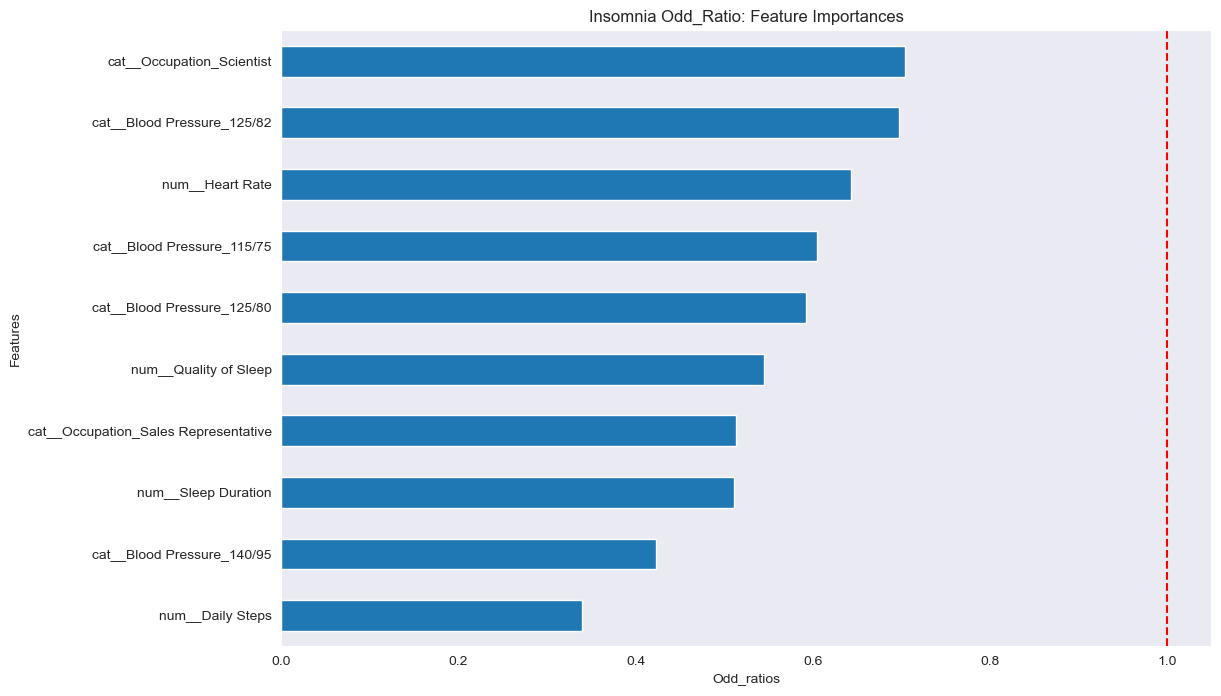

In [80]:
plt.figure(figsize=(12, 8))
insomnia_odds_sorted.head(10).plot(kind="barh", xlabel="Odd_ratios",
                       ylabel="Features", title = "Insomnia Odd_Ratio: Feature Importances")
plt.axvline(1, linestyle="--", color="red")
plt.show()

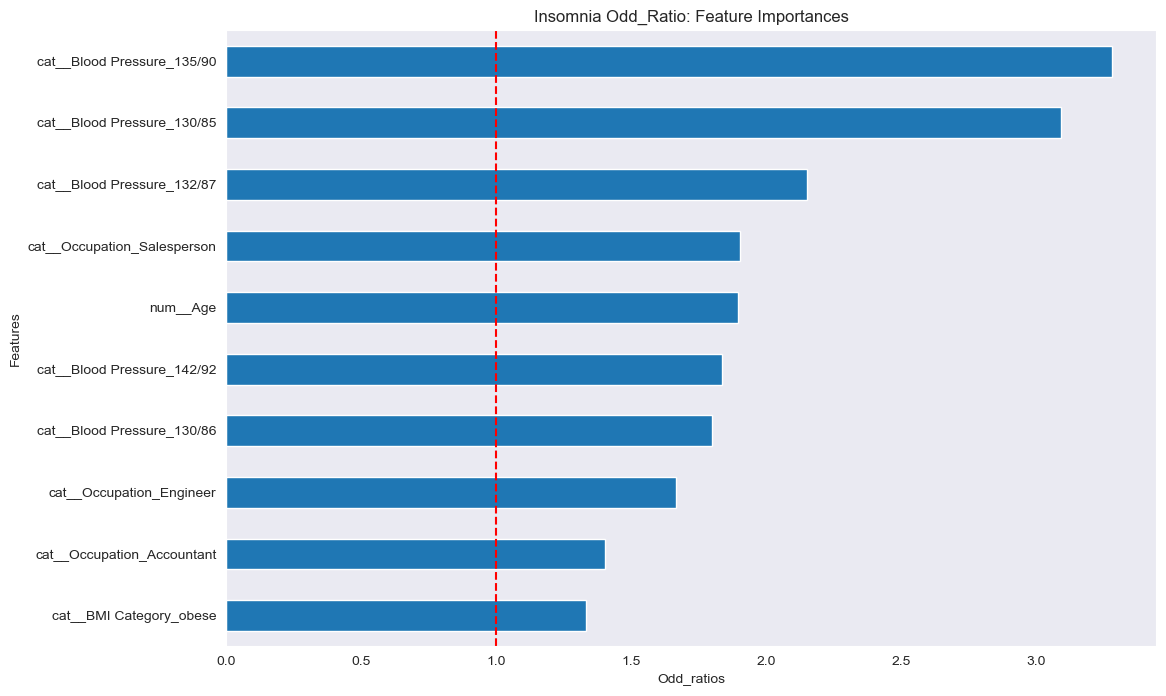

In [81]:
plt.figure(figsize=(12, 8))
insomnia_odds_sorted.tail(10).plot(kind="barh", xlabel="Odd_ratios",
                       ylabel="Features", title = "Insomnia Odd_Ratio: Feature Importances")
plt.axvline(1, linestyle="--", color="red")
plt.show()

In [82]:
class_idx_none = list(model_lr.named_steps["model"].classes_).index("None")
coef_none = model_lr.named_steps["model"].coef_[class_idx_none]
none_odds = pd.Series(np.exp(coef_none), index=features)
none_odds_sorted = none_odds.sort_values()
none_odds_sorted.head()

cat__Blood Pressure_130/85    0.354292
cat__Occupation_Teacher       0.391991
num__Age                      0.478426
cat__Blood Pressure_140/95    0.553727
cat__Blood Pressure_135/90    0.643066
dtype: float64

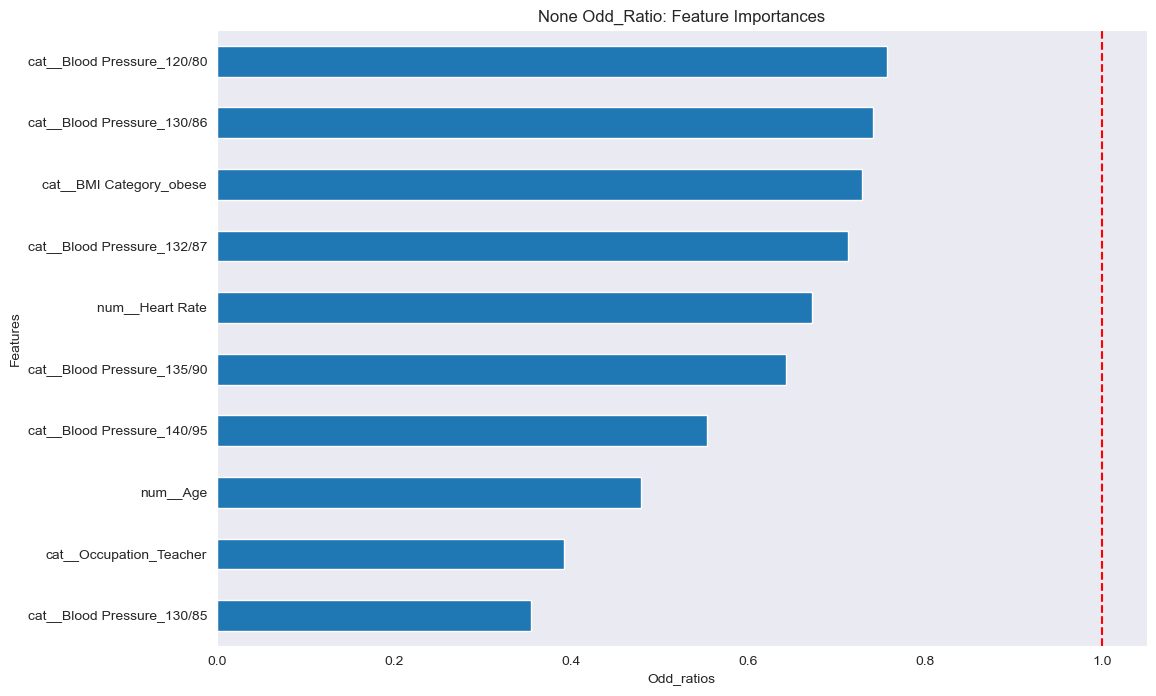

In [83]:
plt.figure(figsize=(12, 8))
none_odds_sorted.head(10).plot(kind="barh", xlabel="Odd_ratios",
                       ylabel="Features", title = "None Odd_Ratio: Feature Importances")
plt.axvline(1, linestyle="--", color="red")
plt.show()

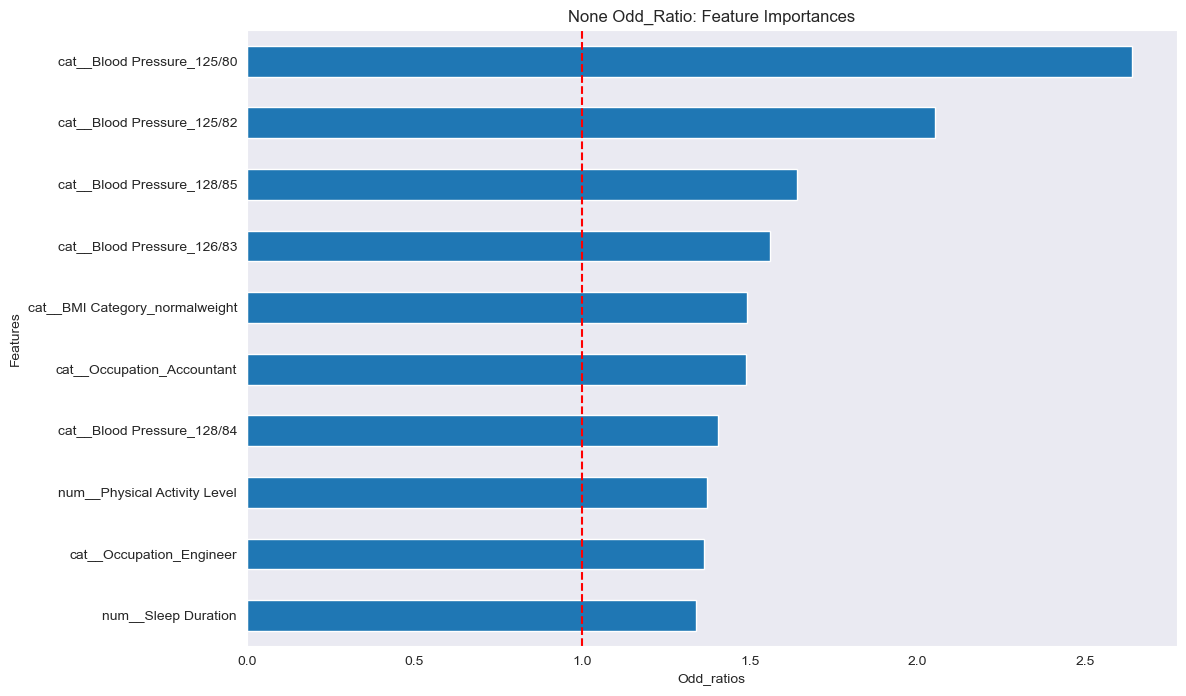

In [84]:
plt.figure(figsize=(12, 8))
none_odds_sorted.tail(10).plot(kind="barh", xlabel="Odd_ratios",
                       ylabel="Features", title = "None Odd_Ratio: Feature Importances")
plt.axvline(1, linestyle="--", color="red")
plt.show()

In [85]:
class_idx_sa = list(model_lr.named_steps["model"].classes_).index("Sleep Apnea")
coef_sa = model_lr.named_steps["model"].coef_[class_idx_sa]
sa_odds = pd.Series(np.exp(coef_sa), index=features)
sa_odds_sorted = sa_odds.sort_values()
sa_odds_sorted.head()

cat__Occupation_Engineer        0.440175
cat__Blood Pressure_135/90      0.473885
cat__Occupation_Accountant      0.478449
cat__Occupation_Salesperson     0.546260
num__Physical Activity Level    0.586092
dtype: float64

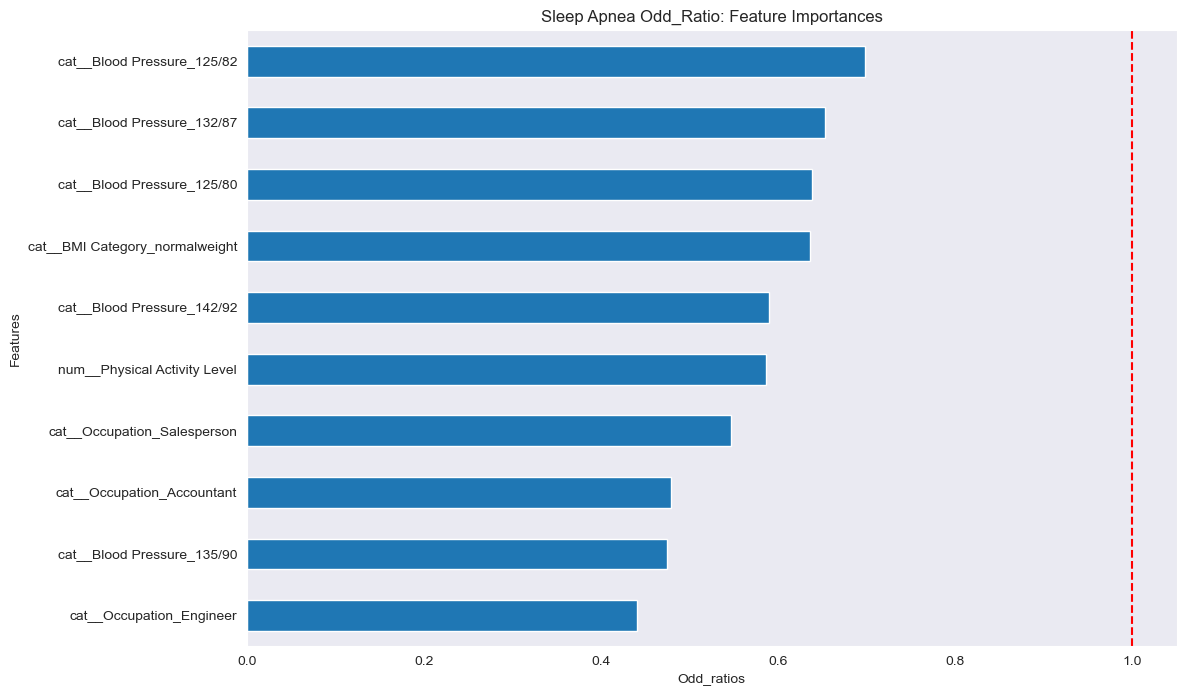

In [86]:
plt.figure(figsize=(12, 8))
sa_odds_sorted.head(10).plot(kind="barh", xlabel="Odd_ratios",
                       ylabel="Features", title = "Sleep Apnea Odd_Ratio: Feature Importances")
plt.axvline(1, linestyle="--", color="red")
plt.show()

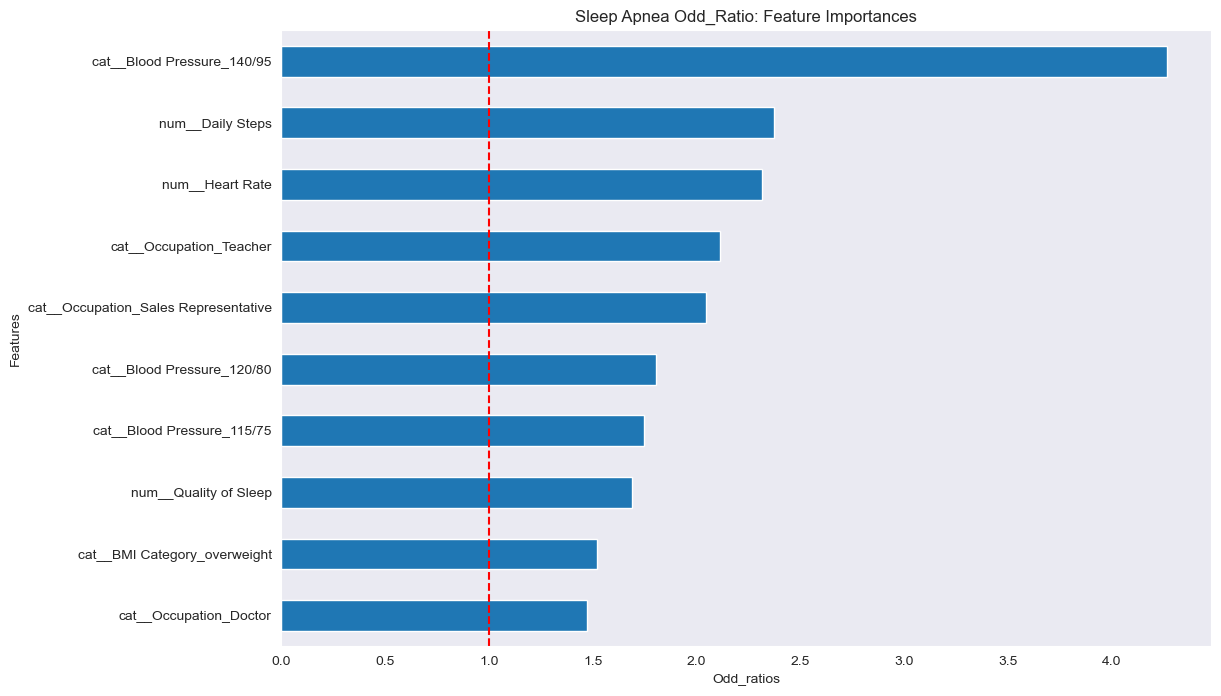

In [87]:
plt.figure(figsize=(12, 8))
sa_odds_sorted.tail(10).plot(kind="barh", xlabel="Odd_ratios",
                       ylabel="Features", title = "Sleep Apnea Odd_Ratio: Feature Importances")
plt.axvline(1, linestyle="--", color="red")
plt.show()

In [88]:
baseline_lr = y_train.value_counts(normalize=True).max()
baseline_lr

0.5857142857142857

In [89]:
y_pred = model_lr.predict(X_test)

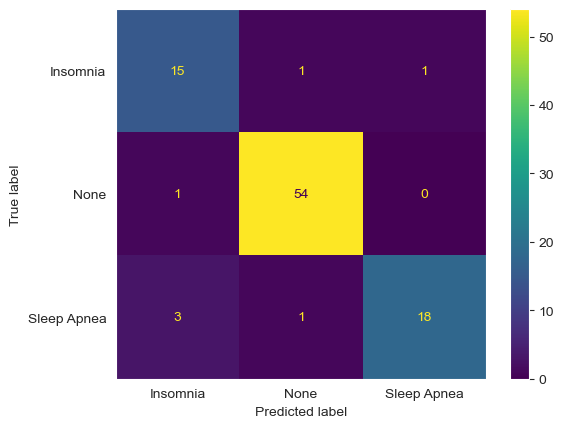

In [90]:
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test);

In [91]:
print("Classification Report LR: \n", classification_report(y_test, y_pred))

Classification Report LR: 
               precision    recall  f1-score   support

    Insomnia       0.79      0.88      0.83        17
        None       0.96      0.98      0.97        55
 Sleep Apnea       0.95      0.82      0.88        22

    accuracy                           0.93        94
   macro avg       0.90      0.89      0.89        94
weighted avg       0.93      0.93      0.93        94



# Decision Tree, Random Forest and Gradient Boosting

**Handling Imbalance in the Dataset**

In [94]:
over_sampler = RandomOverSampler(random_state=42)
X_train_ov, y_train_ov = over_sampler.fit_resample(X_train, y_train)
X_train_ov.shape, y_train_ov.shape

((492, 14), (492,))

In [95]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_un, y_train_un = under_sampler.fit_resample(X_train, y_train)
X_train_un.shape, y_train_un.shape

((168, 14), (168,))

**Decision Tree Model**

In [97]:
dt = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=True, class_weight="balanced")
)

In [98]:
dt.fit(X_train, y_train)

,steps,"[('onehotencoder', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,"['Gender', 'Occupation', ...]"
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,True


In [99]:
print("Nomal score:", dt.score(X_train, y_train))

Nomal score: 0.9107142857142857


In [100]:
print("Classification Report DT:\n", classification_report(y_test, dt.predict(X_test)))

Classification Report DT:
               precision    recall  f1-score   support

    Insomnia       0.54      0.82      0.65        17
        None       0.96      0.80      0.87        55
 Sleep Apnea       0.77      0.77      0.77        22

    accuracy                           0.80        94
   macro avg       0.76      0.80      0.77        94
weighted avg       0.84      0.80      0.81        94



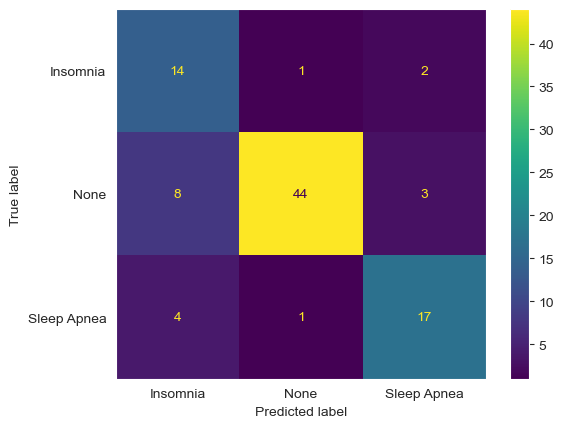

In [101]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test);

In [102]:
dt_ov = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=True)
)

dt_ov.fit(X_train_ov, y_train_ov)
print("Over score: ", dt.score(X_train_ov, y_train_ov))

Over score:  0.9329268292682927


In [103]:
print("Classification Report DT over_sampling:\n", classification_report(y_test, dt_ov.predict(X_test)))

Classification Report DT over_sampling:
               precision    recall  f1-score   support

    Insomnia       0.54      0.82      0.65        17
        None       0.94      0.82      0.87        55
 Sleep Apnea       0.80      0.73      0.76        22

    accuracy                           0.80        94
   macro avg       0.76      0.79      0.76        94
weighted avg       0.83      0.80      0.81        94



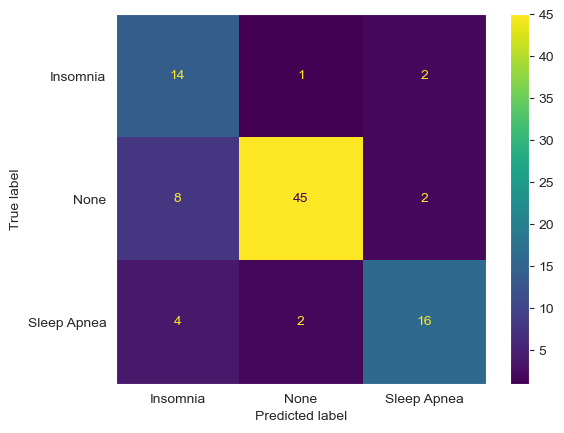

In [104]:
ConfusionMatrixDisplay.from_estimator(dt_ov, X_test, y_test);

In [105]:
dt_un = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=True)
)

dt_un.fit(X_train_un, y_train_un)
print("under score: ", dt.score(X_train_un, y_train_un))

under score:  0.9285714285714286


In [106]:
print("Classification Report DT under_sampling:\n", classification_report(y_test, dt_un.predict(X_test)))

Classification Report DT under_sampling:
               precision    recall  f1-score   support

    Insomnia       0.50      0.82      0.62        17
        None       0.94      0.82      0.87        55
 Sleep Apnea       0.89      0.73      0.80        22

    accuracy                           0.80        94
   macro avg       0.78      0.79      0.77        94
weighted avg       0.85      0.80      0.81        94



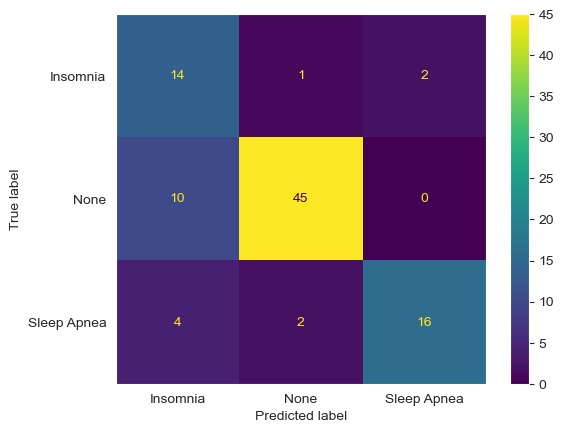

In [107]:
ConfusionMatrixDisplay.from_estimator(dt_un, X_test, y_test);

In [108]:
depth = dt.named_steps["decisiontreeclassifier"].get_depth()
depth_param = range(1, 10)

In [109]:
training_acc = []
training_acc_ov =[]
training_acc_un =[]
test_acc = []
test_acc_ov =[]
test_acc_un =[]
for d in depth_param:
    model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=d, random_state=42, class_weight="balanced")
    )
    model_ov = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    model_un = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    model.fit(X_train, y_train)
    model_ov.fit(X_train_ov, y_train_ov)
    model_un.fit(X_train_un, y_train_un)
    
    training_accuracy = model.score(X_train,y_train)
    training_accuracy_ov = model_ov.score(X_train_ov, y_train_ov)
    training_accuracy_un = model_un.score(X_train_un, y_train_un)
    
    training_acc.append(training_accuracy)
    training_acc_ov.append(training_accuracy_ov)
    training_acc_un.append(training_accuracy_un)
    
    test_acc_score = model.score(X_test,y_test)
    test_acc_ov_score = model_ov.score(X_test,y_test)
    test_acc_un_score = model_un.score(X_test,y_test)
    
    test_acc.append(test_acc_score)
    test_acc_ov.append(test_acc_ov_score)
    test_acc_un.append(test_acc_un_score)

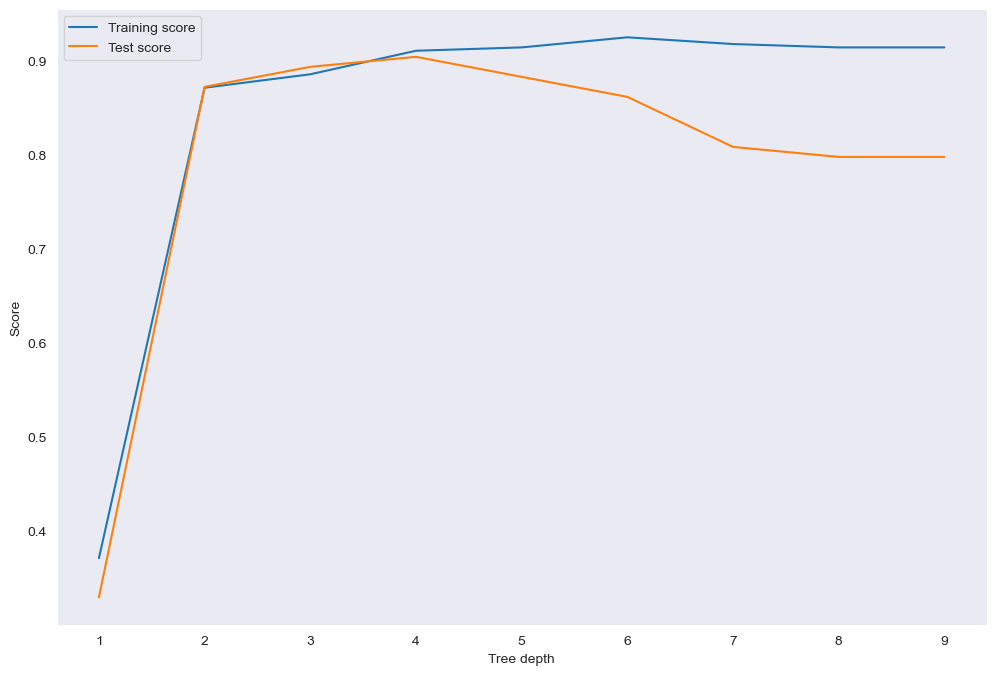

In [110]:
plt.figure(figsize=(12, 8))
plt.plot(depth_param, training_acc, label="Training score")
plt.plot(depth_param, test_acc, label="Test score")
plt.xlabel("Tree depth")
plt.ylabel("Score")
plt.legend()
plt.show()

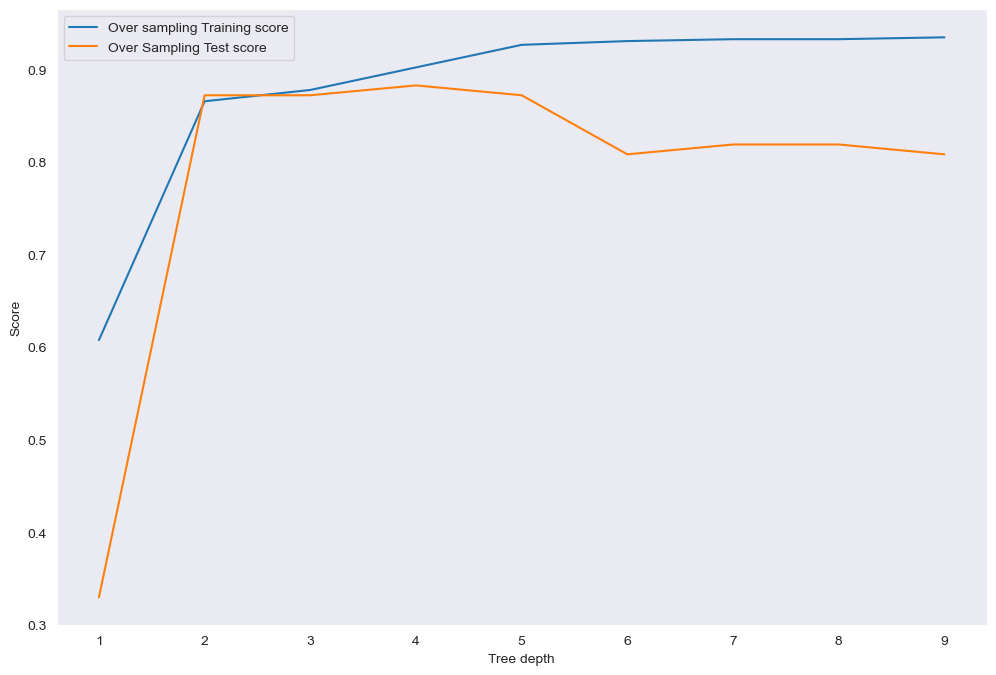

In [111]:
plt.figure(figsize=(12, 8))
plt.plot(depth_param, training_acc_ov, label="Over sampling Training score")
plt.plot(depth_param, test_acc_ov, label="Over Sampling Test score")
plt.xlabel("Tree depth")
plt.ylabel("Score")
plt.legend()
plt.show()

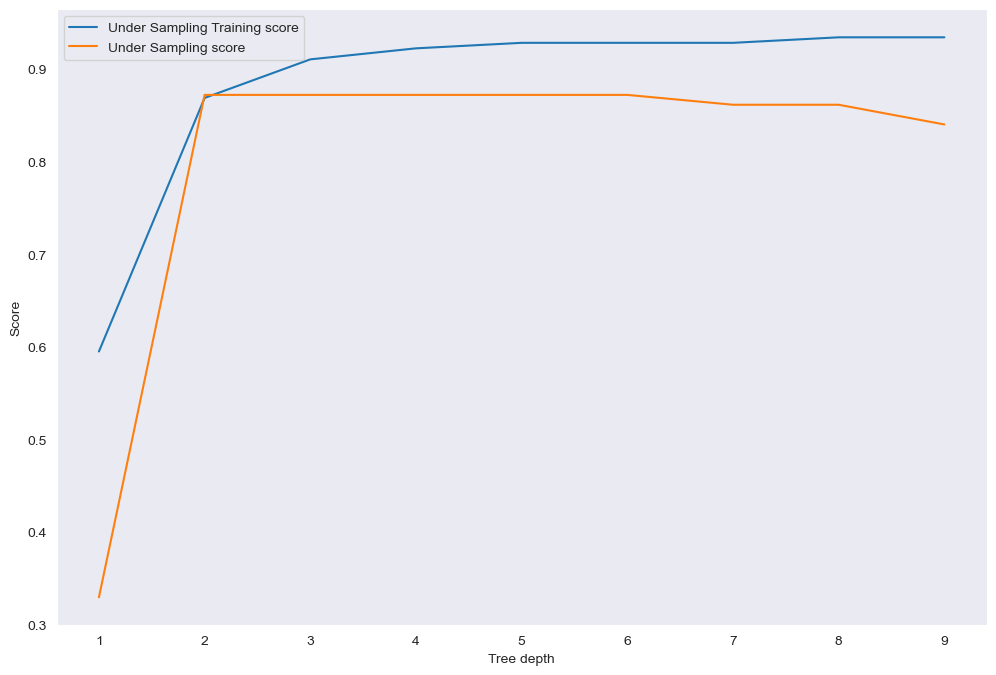

In [112]:
plt.figure(figsize=(12, 8))
plt.plot(depth_param, training_acc_un, label="Under Sampling Training score")
plt.plot(depth_param, test_acc_un, label="Under Sampling score")
plt.xlabel("Tree depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [113]:
dt_over = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=True, max_depth=2)
)

dt_over.fit(X_train_ov, y_train_ov)
print("Over score: ", dt_over.score(X_train_ov, y_train_ov))

Over score:  0.8658536585365854


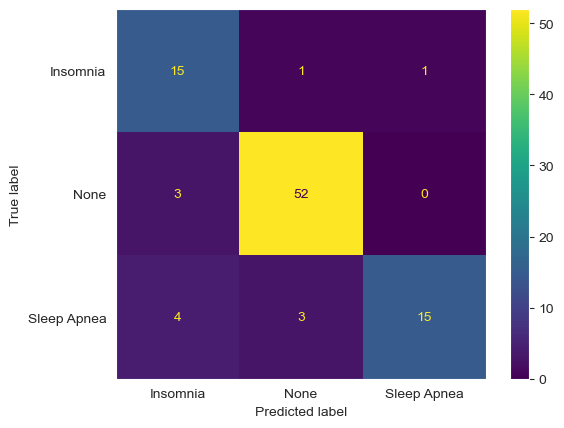

In [114]:
ConfusionMatrixDisplay.from_estimator(dt_over, X_test, y_test);

In [115]:
print("Classification Report DT over_tuned:\n", classification_report(y_test, dt_over.predict(X_test)))

Classification Report DT over_tuned:
               precision    recall  f1-score   support

    Insomnia       0.68      0.88      0.77        17
        None       0.93      0.95      0.94        55
 Sleep Apnea       0.94      0.68      0.79        22

    accuracy                           0.87        94
   macro avg       0.85      0.84      0.83        94
weighted avg       0.89      0.87      0.87        94



In [116]:
dt_new = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=True, max_depth=4, class_weight="balanced")
)
dt_new.fit(X_train, y_train)
print("score: ", dt_new.score(X_train, y_train))

score:  0.9107142857142857


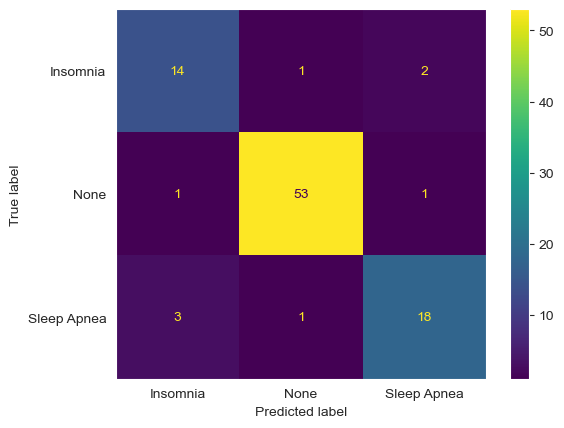

In [117]:
ConfusionMatrixDisplay.from_estimator(dt_new, X_test, y_test);

In [118]:
print("Classification Report DT tuned:\n", classification_report(y_test, dt_new.predict(X_test)))

Classification Report DT tuned:
               precision    recall  f1-score   support

    Insomnia       0.78      0.82      0.80        17
        None       0.96      0.96      0.96        55
 Sleep Apnea       0.86      0.82      0.84        22

    accuracy                           0.90        94
   macro avg       0.87      0.87      0.87        94
weighted avg       0.91      0.90      0.90        94



In [119]:
dt_under = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=True, max_depth=2)
)

dt_under.fit(X_train_un, y_train_un)
print("under score: ", dt_under.score(X_train_un, y_train_un))

under score:  0.8690476190476191


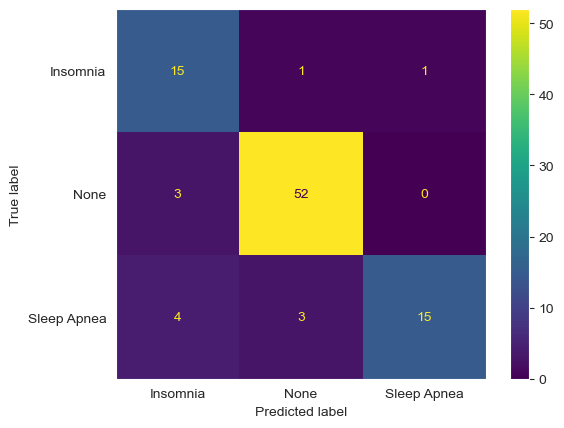

In [120]:
ConfusionMatrixDisplay.from_estimator(dt_under, X_test, y_test);

In [121]:
print("Classification Report DT under_tuned:\n", classification_report(y_test, dt_under.predict(X_test)))

Classification Report DT under_tuned:
               precision    recall  f1-score   support

    Insomnia       0.68      0.88      0.77        17
        None       0.93      0.95      0.94        55
 Sleep Apnea       0.94      0.68      0.79        22

    accuracy                           0.87        94
   macro avg       0.85      0.84      0.83        94
weighted avg       0.89      0.87      0.87        94



<Axes: >

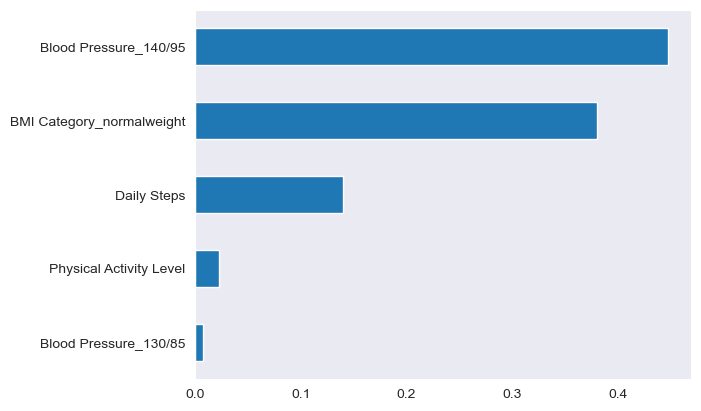

In [122]:
feat_dt = dt_new.named_steps["onehotencoder"].get_feature_names_out()
importance_dt = dt_new.named_steps["decisiontreeclassifier"].feature_importances_

feat_imp_dt = pd.Series(importance_dt, index=feat_dt).sort_values()
feat_imp_dt.tail().plot(kind="barh")

In [202]:
feat_imp_dt

Gender_Male                        0.000000
Blood Pressure_115/75              0.000000
Blood Pressure_125/82              0.000000
Blood Pressure_132/87              0.000000
Blood Pressure_130/86              0.000000
Blood Pressure_128/85              0.000000
Blood Pressure_140/90              0.000000
Blood Pressure_129/84              0.000000
Blood Pressure_131/86              0.000000
Blood Pressure_117/76              0.000000
Blood Pressure_135/90              0.000000
Blood Pressure_142/92              0.000000
Blood Pressure_118/75              0.000000
Blood Pressure_115/78              0.000000
Blood Pressure_139/91              0.000000
Blood Pressure_122/80              0.000000
Blood Pressure_119/77              0.000000
Blood Pressure_121/79              0.000000
Blood Pressure_126/83              0.000000
Heart Rate                         0.000000
Stress_HR                          0.000000
Blood Pressure_128/84              0.000000
Blood Pressure_125/80           

**Randon Forest Model**

In [124]:
pipe_new = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=42, class_weight="balanced_subsample")
)

pipe_new.fit(X_train, y_train)

,steps,"[('onehotencoder', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,"['Gender', 'Occupation', ...]"
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,True


In [125]:
rf_depth = pipe_new.named_steps["randomforestclassifier"]

tree_depths = [estimator.get_depth() for estimator in rf_depth.estimators_]

max_depth = max(tree_depths)
min_depth = min(tree_depths)

max_depth, min_depth

(16, 8)

In [126]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=42, class_weight="balanced_subsample")
)

params = {
    "randomforestclassifier__n_estimators": range(20, 120, 20),
    "randomforestclassifier__max_depth": range(2, 11, 2)
}

rf_model = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'randomforestclassifier__max_depth': range(2, 11, 2), 'randomforestclassifier__n_estimators': range(20, 120, 20)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,verbose,0


In [224]:
results_rf = pd.DataFrame(rf_model.cv_results_).sort_values(by="rank_test_score")
results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.344320,0.069538,0.063492,0.029167,6,20,"{'randomforestclassifier__max_depth': 6, 'rand...",0.857143,0.875,0.928571,0.946429,0.910714,0.903571,0.033120,1
12,1.023306,0.232813,0.096309,0.050892,6,60,"{'randomforestclassifier__max_depth': 6, 'rand...",0.821429,0.875,0.928571,0.946429,0.910714,0.896429,0.044320,2
19,0.738477,0.097670,0.050729,0.009530,8,100,"{'randomforestclassifier__max_depth': 8, 'rand...",0.821429,0.875,0.928571,0.946429,0.910714,0.896429,0.044320,2
14,1.317749,0.394015,0.113326,0.042523,6,100,"{'randomforestclassifier__max_depth': 6, 'rand...",0.821429,0.875,0.928571,0.946429,0.910714,0.896429,0.044320,2
5,0.376318,0.087534,0.060280,0.012634,4,20,"{'randomforestclassifier__max_depth': 4, 'rand...",0.821429,0.875,0.928571,0.946429,0.892857,0.892857,0.043741,5


In [128]:
rf_model.best_params_

{'randomforestclassifier__max_depth': 6,
 'randomforestclassifier__n_estimators': 20}

In [129]:
rf = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=42, max_depth=6, n_estimators=20, class_weight="balanced_subsample")
)

rf.fit(X_train, y_train)

,steps,"[('onehotencoder', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,"['Gender', 'Occupation', ...]"
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,True


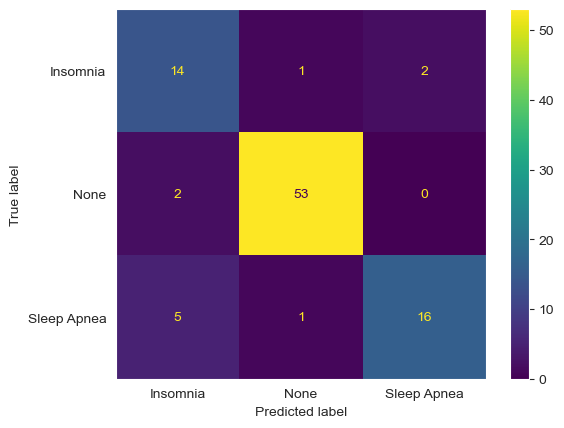

In [130]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test);

In [131]:
print("Classification Report RF Over_sampling: \n", classification_report(y_test, rf.predict(X_test)))

Classification Report RF Over_sampling: 
               precision    recall  f1-score   support

    Insomnia       0.67      0.82      0.74        17
        None       0.96      0.96      0.96        55
 Sleep Apnea       0.89      0.73      0.80        22

    accuracy                           0.88        94
   macro avg       0.84      0.84      0.83        94
weighted avg       0.89      0.88      0.88        94



In [132]:
pipe_1 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=42)
)

params = {
    "randomforestclassifier__n_estimators": range(20, 120, 20),
    "randomforestclassifier__max_depth": range(2, 11, 2)
}

rf_model_1 = GridSearchCV(pipe_1, param_grid=params, cv=5, n_jobs=-1, verbose=1)
rf_model_1.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'randomforestclassifier__max_depth': range(2, 11, 2), 'randomforestclassifier__n_estimators': range(20, 120, 20)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,verbose,0


In [133]:
results_rf_1 = pd.DataFrame(rf_model_1.cv_results_).sort_values(by="rank_test_score")
results_rf_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.656784,0.159163,0.092038,0.056016,6,100,"{'randomforestclassifier__max_depth': 6, 'rand...",0.892857,0.875000,0.928571,0.946429,0.910714,0.910714,0.025254,1
10,0.292217,0.112986,0.044736,0.011282,6,20,"{'randomforestclassifier__max_depth': 6, 'rand...",0.892857,0.857143,0.928571,0.946429,0.910714,0.907143,0.030723,2
12,0.486628,0.139021,0.046890,0.009090,6,60,"{'randomforestclassifier__max_depth': 6, 'rand...",0.857143,0.875000,0.928571,0.946429,0.910714,0.903571,0.033120,3
13,0.568444,0.144795,0.056385,0.018778,6,80,"{'randomforestclassifier__max_depth': 6, 'rand...",0.857143,0.875000,0.928571,0.946429,0.910714,0.903571,0.033120,3
11,0.354958,0.122523,0.042225,0.010516,6,40,"{'randomforestclassifier__max_depth': 6, 'rand...",0.857143,0.875000,0.928571,0.946429,0.910714,0.903571,0.033120,3


In [134]:
rf_model_1.best_params_

{'randomforestclassifier__max_depth': 6,
 'randomforestclassifier__n_estimators': 100}

In [135]:
rf_1 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=42, max_depth=6, n_estimators=100)
)

rf_1.fit(X_train, y_train)

,steps,"[('onehotencoder', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,"['Gender', 'Occupation', ...]"
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,True


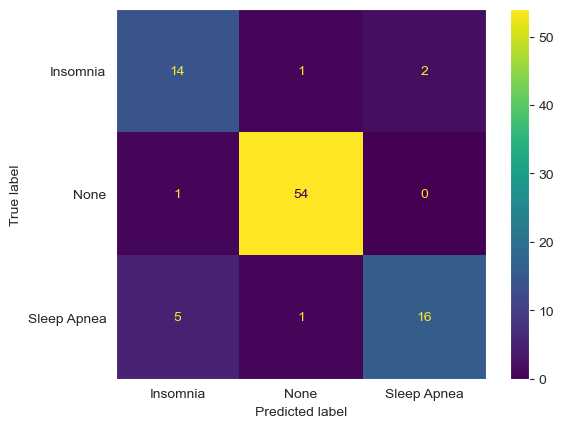

In [136]:
ConfusionMatrixDisplay.from_estimator(rf_1, X_test, y_test);

In [137]:
print("Classification Report RF: \n", classification_report(y_test, rf_1.predict(X_test)))

Classification Report RF: 
               precision    recall  f1-score   support

    Insomnia       0.70      0.82      0.76        17
        None       0.96      0.98      0.97        55
 Sleep Apnea       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94



<Axes: >

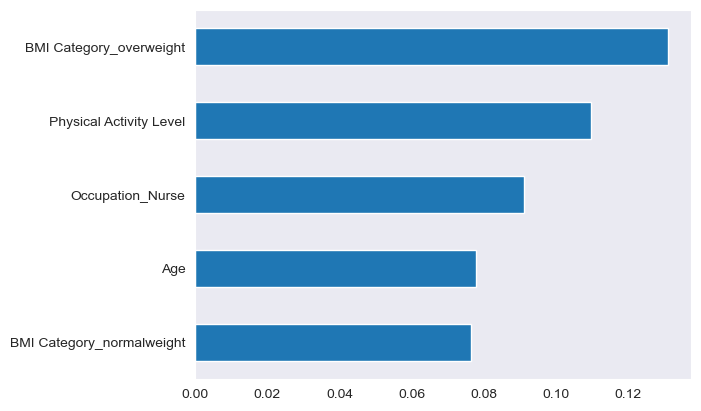

In [226]:
feat = rf.named_steps["onehotencoder"].get_feature_names_out()
importance_rf = rf.named_steps["randomforestclassifier"].feature_importances_

feat_imp_rf = pd.Series(importance_rf, index=feat).sort_values()
feat_imp_rf.tail().plot(kind="barh")

In [228]:
feat_imp_rf 

Occupation_Manager                 0.000000e+00
Occupation_Sales Representative    0.000000e+00
Blood Pressure_140/90              0.000000e+00
Blood Pressure_115/78              0.000000e+00
Blood Pressure_119/77              0.000000e+00
Occupation_Software Engineer       0.000000e+00
Blood Pressure_121/79              0.000000e+00
Blood Pressure_122/80              1.307823e-18
Blood Pressure_130/86              1.309862e-04
Blood Pressure_128/84              3.401531e-04
Blood Pressure_117/76              3.616439e-04
Blood Pressure_139/91              6.453160e-04
Blood Pressure_118/75              6.738376e-04
Blood Pressure_128/85              8.030377e-04
Blood Pressure_132/87              8.560920e-04
Blood Pressure_129/84              1.397810e-03
Blood Pressure_126/83              1.426184e-03
Blood Pressure_120/80              1.686380e-03
Occupation_Lawyer                  1.772681e-03
Gender_Female                      1.840787e-03
Occupation_Scientist               3.072

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train, sample_weight=sample_weights)

Gradient Boosting Model

In [140]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(
    class_weight="balanced",
    y=y_train
)

In [142]:
pipe_gb = Pipeline(
    steps=[
        ("preprocess", column_trans),
        ("gradientboostingclassifier", GradientBoostingClassifier())
    ]
)

params = {
    "gradientboostingclassifier__n_estimators": range(20, 120, 20),
    "gradientboostingclassifier__max_depth": range(2, 11)
}

gb_model = GridSearchCV(pipe_gb, param_grid=params, cv=5, n_jobs=-1, verbose=1)
gb_model.fit(
    X_train,
    y_train,
    gradientboostingclassifier__sample_weight=sample_weights
)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'gradientboostingclassifier__max_depth': range(2, 11), 'gradientboostingclassifier__n_estimators': range(20, 120, 20)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [210]:
results_gb = pd.DataFrame(gb_model.cv_results_).sort_values(by="rank_test_score")
results_gb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.437353,0.051514,0.027633,0.001324,2,40,"{'gradientboostingclassifier__max_depth': 2, '...",0.803571,0.875,0.928571,0.946429,0.892857,0.889286,0.049744,1
0,0.307968,0.047544,0.037714,0.006208,2,20,"{'gradientboostingclassifier__max_depth': 2, '...",0.803571,0.875,0.910714,0.946429,0.892857,0.885714,0.047380,2
5,0.276662,0.047368,0.026487,0.000945,3,20,"{'gradientboostingclassifier__max_depth': 3, '...",0.803571,0.875,0.928571,0.928571,0.892857,0.885714,0.046015,2
2,0.470772,0.006888,0.025717,0.001607,2,60,"{'gradientboostingclassifier__max_depth': 2, '...",0.767857,0.875,0.928571,0.946429,0.892857,0.882143,0.062474,4
3,0.588317,0.010913,0.032145,0.008393,2,80,"{'gradientboostingclassifier__max_depth': 2, '...",0.803571,0.875,0.928571,0.910714,0.875000,0.878571,0.042857,5


In [212]:
gb_model.best_params_

{'gradientboostingclassifier__max_depth': 2,
 'gradientboostingclassifier__n_estimators': 40}

In [214]:
gb = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    GradientBoostingClassifier(random_state=42, max_depth=2, n_estimators=40)
)
gb.fit(X_train, y_train, gradientboostingclassifier__sample_weight=sample_weights)

,steps,"[('onehotencoder', ...), ('gradientboostingclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,"['Gender', 'Occupation', ...]"
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,True


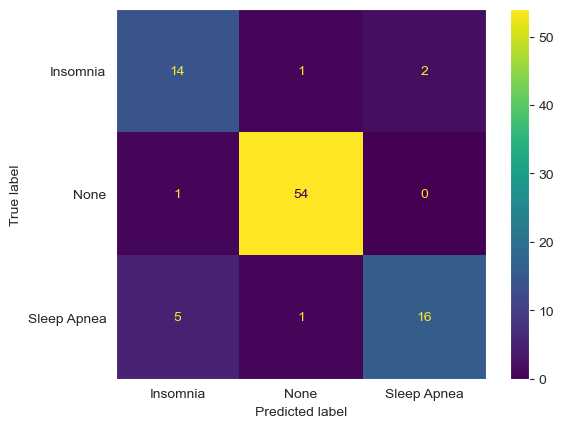

In [216]:
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test);

In [218]:
print("Classification Report GB over_sampling: \n", classification_report(y_test, gb.predict(X_test)))

Classification Report GB over_sampling: 
               precision    recall  f1-score   support

    Insomnia       0.70      0.82      0.76        17
        None       0.96      0.98      0.97        55
 Sleep Apnea       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94



<Axes: >

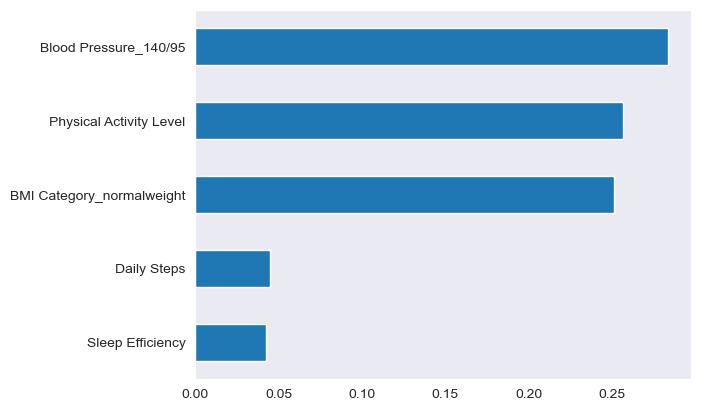

In [220]:
feat_gb = gb.named_steps["onehotencoder"].get_feature_names_out()
importance_gb = gb.named_steps["gradientboostingclassifier"].feature_importances_

feat_imp_gb=pd.Series(importance_gb, index=feat_gb).sort_values()

feat_imp_gb.tail().plot(kind="barh")

In [222]:
feat_imp_gb

Short Sleep                        0.000000
Blood Pressure_140/90              0.000000
BMI Category_overweight            0.000000
Blood Pressure_129/84              0.000000
Blood Pressure_131/86              0.000000
Blood Pressure_117/76              0.000000
Blood Pressure_118/75              0.000000
Occupation_Manager                 0.000000
Occupation_Sales Representative    0.000000
Occupation_Software Engineer       0.000000
Occupation_Scientist               0.000000
Blood Pressure_115/78              0.000000
Blood Pressure_119/77              0.000000
Occupation_Doctor                  0.000000
Occupation_Lawyer                  0.000000
Occupation_Salesperson             0.000000
Blood Pressure_121/79              0.000000
BMI Category_obese                 0.000000
Blood Pressure_135/90              0.000000
Gender_Female                      0.000003
Occupation_Nurse                   0.000016
Occupation_Engineer                0.000204
Gender_Male                     

In [149]:
X_train_ov.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Stress_HR',
       'Sleep Efficiency', 'Short Sleep'],
      dtype='object')

In [150]:
def prediction_lr(gender,age,job,SDur,QSleep,Act_Lev,St_L,BMI,BP,HR,DSteps,St_HR,SEf,SS):
    data =pd.DataFrame({
        'Gender': [gender], 'Age': [age], 'Occupation': [job], 'Sleep Duration': [SDur],'Quality of Sleep': [QSleep],
       'Physical Activity Level':[Act_Lev], 'Stress Level':[St_L], 'BMI Category': [BMI],
       'Blood Pressure': [BP], 'Heart Rate': [HR], 'Daily Steps': [DSteps], 'Stress_HR': [St_HR],
       'Sleep Efficiency': [SEf], 'Short Sleep':[SS]
    })
    sleep_disorder = model_lr.predict(data)
    return sleep_disorder

In [151]:
X_train_ov.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Stress_HR,Sleep Efficiency,Short Sleep
0,Male,44,Salesperson,6.3,6,45,7,overweight,130/85,72,6000,504,0.952381,0
1,Male,44,Salesperson,6.3,6,45,7,overweight,130/85,72,6000,504,0.952381,0
2,Male,38,Lawyer,7.1,8,60,5,normalweight,130/85,68,8000,340,1.126761,0
3,Male,29,Doctor,6.0,6,30,8,normalweight,120/80,70,8000,560,1.000000,0
4,Male,44,Salesperson,6.3,6,45,7,overweight,130/85,72,6000,504,0.952381,0


In [152]:
prediction_lr("Male",44,"Salesperson",6.3,6,45,7,"overweight","130/85",72,6000,504,0.952381,0)

array(['Insomnia'], dtype=object)

In [153]:
prediction_lr("Male",54,"Engineer",8.4,9,30,3,"normalweight","125/80",65,5000,195,1.071429,0)

array(['None'], dtype=object)

In [154]:
X_test.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Stress_HR,Sleep Efficiency,Short Sleep
Person ID,,,,,,,,,,,,,,
330,Female,53,Engineer,8.5,9,30,3,normalweight,125/80,65,5000,195,1.058824,0
34,Male,31,Doctor,6.1,6,30,8,normalweight,125/80,72,5000,576,0.983607,0
16,Male,29,Doctor,6.0,6,30,8,normalweight,120/80,70,8000,560,1.000000,0
326,Female,53,Engineer,8.5,9,30,3,normalweight,125/80,65,5000,195,1.058824,0
58,Male,32,Doctor,6.0,6,30,8,normalweight,125/80,72,5000,576,1.000000,0
240,Male,44,Salesperson,6.4,6,45,7,overweight,130/85,72,6000,504,0.937500,0
77,Male,33,Doctor,6.0,6,30,8,normalweight,125/80,72,5000,576,1.000000,0
120,Female,37,Accountant,7.2,8,60,4,normalweight,115/75,68,7000,272,1.111111,0
333,Female,54,Engineer,8.4,9,30,3,normalweight,125/80,65,5000,195,1.071429,0


In [155]:
prediction_lr("Female",54,"Engineer",8.4,9,30,3,"normalweight","125/80",65,5000,195,1.071429,0)

array(['None'], dtype=object)

In [156]:
def prediction_dt(gender,age,job,SDur,QSleep,Act_Lev,St_L,BMI,BP,HR,DSteps,St_HR,SEf,SS):
    data =pd.DataFrame({
        'Gender': [gender], 'Age': [age], 'Occupation': [job], 'Sleep Duration': [SDur],'Quality of Sleep': [QSleep],
       'Physical Activity Level':[Act_Lev], 'Stress Level':[St_L], 'BMI Category': [BMI],
       'Blood Pressure': [BP], 'Heart Rate': [HR], 'Daily Steps': [DSteps], 'Stress_HR': [St_HR],
       'Sleep Efficiency': [SEf], 'Short Sleep':[SS]
    })
    sleep_disorder = dt_over.predict(data)
    return sleep_disorder

In [157]:
prediction_dt("Male",44,"Salesperson",6.3,6,45,7,"overweight","130/85",72,6000,504,0.952381,0)

array(['Insomnia'], dtype=object)

In [158]:
prediction_dt("Female",54,"Engineer",8.4,9,30,3,"normalweight","125/80",65,5000,195,1.071429,0)

array(['None'], dtype=object)

In [159]:
def prediction_rf(gender,age,job,SDur,QSleep,Act_Lev,St_L,BMI,BP,HR,DSteps,St_HR,SEf,SS):
    data =pd.DataFrame({
        'Gender': [gender], 'Age': [age], 'Occupation': [job], 'Sleep Duration': [SDur],'Quality of Sleep': [QSleep],
       'Physical Activity Level':[Act_Lev], 'Stress Level':[St_L], 'BMI Category': [BMI],
       'Blood Pressure': [BP], 'Heart Rate': [HR], 'Daily Steps': [DSteps], 'Stress_HR': [St_HR],
       'Sleep Efficiency': [SEf], 'Short Sleep':[SS]
    })
    sleep_disorder = rf_1.predict(data)
    return sleep_disorder

In [160]:
prediction_rf("Male",44,"Salesperson",6.3,6,45,7,"overweight","130/85",72,6000,504,0.952381,0)

array(['Insomnia'], dtype=object)

In [161]:
prediction_rf("Female",54,"Engineer",8.4,9,30,3,"normalweight","125/80",65,5000,195,1.071429,0)

array(['None'], dtype=object)

In [162]:
def prediction_gb(gender,age,job,SDur,QSleep,Act_Lev,St_L,BMI,BP,HR,DSteps,St_HR,SEf,SS):
    data =pd.DataFrame({
        'Gender': [gender], 'Age': [age], 'Occupation': [job], 'Sleep Duration': [SDur],'Quality of Sleep': [QSleep],
       'Physical Activity Level':[Act_Lev], 'Stress Level':[St_L], 'BMI Category': [BMI],
       'Blood Pressure': [BP], 'Heart Rate': [HR], 'Daily Steps': [DSteps], 'Stress_HR': [St_HR],
       'Sleep Efficiency': [SEf], 'Short Sleep':[SS]
    })
    sleep_disorder = gb.predict(data)
    return sleep_disorder

In [163]:
prediction_gb("Male",44,"Salesperson",6.3,6,45,7,"overweight","130/85",72,6000,504,0.952381,0)

array(['Insomnia'], dtype=object)

In [164]:
prediction_gb("Female",54,"Engineer",8.4,9,30,3,"normalweight","125/80",65,5000,195,1.071429,0)

array(['None'], dtype=object)

In [165]:
with open("sleep_disorder_lr_model.pkl", "wb") as f:
    pickle.dump(model_lr, f)

In [166]:
with open("sleep_disorder_dt_model.pkl", "wb") as f:
    pickle.dump(dt_over, f)

In [167]:
with open("sleep_disorder_rf_model.pkl", "wb") as f:
    pickle.dump(rf_1, f)

In [168]:
with open("sleep_disorder_gb_model.pkl", "wb") as f:
    pickle.dump(gb, f)